<a href="https://colab.research.google.com/github/DustCoyote/Data-mining/blob/main/Anyloss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "diabetes.csv"  # Changed file_path to 'diabetes.csv'

# Load the latest version
diabetes_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mathchi/diabetes-data-set",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", diabetes_df.head())

/tmp/ipython-input-1852603579.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  diabetes_df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'diabetes-data-set' dataset.
First 5 records:    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
zero_features = ['Pregnancies','Glucose','BloodPressure','SkinThickness',"Insulin",'BMI']
total_count = diabetes_df['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes_df[diabetes_df[feature]==0][feature].count()
    print('{0} 0 number of cases {1}, percent is {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Pregnancies 0 number of cases 111, percent is 14.45 %
Glucose 0 number of cases 5, percent is 0.65 %
BloodPressure 0 number of cases 35, percent is 4.56 %
SkinThickness 0 number of cases 227, percent is 29.56 %
Insulin 0 number of cases 374, percent is 48.70 %
BMI 0 number of cases 11, percent is 1.43 %


In [ ]:
diabetes_mean = diabetes_df[zero_features].mean()
diabetes_df[zero_features]=diabetes_df[zero_features].replace(0, diabetes_mean)

In [ ]:
X = diabetes_df.iloc[:,:-1]
y = diabetes_df.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[ 0.66656426,  0.87356913,  0.03798835, ...,  0.23938016,
         0.67885839,  1.22064035],
       [-5.19933758, -1.33517774, -0.55959227, ..., -0.79908276,
        -0.05958613,  0.1397103 ],
       [ 1.09680356,  1.70850819, -0.73121725, ..., -1.43402046,
         0.7880981 ,  0.20396118],
       ...,
       [ 0.45867907,  0.11578833,  0.03798835, ..., -0.84688572,
        -0.66357894,  0.07603162],
       [-5.19933758,  0.29541514, -1.09680356, ..., -0.29541514,
        -0.06447445,  1.12020535],
       [-5.19933758, -0.94740127, -0.11418529, ..., -0.25634059,
        -0.20271045, -0.83442701]])

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 混淆矩陣 + 指標
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[83 16]
 [20 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



# anyloss

In [ ]:

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import metrics

In [1]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import metrics

def pca(df_X, df_y):
    pca = PCA(n_components = 2)
    pca.fit(df_X)
    df_pca = pca.transform(df_X)
    df_pca = pd.DataFrame(df_pca, columns = ['comp. 0', 'comp. 1'])
    df_pca['target'] = df_y
    print('variance ratio:', pca.explained_variance_ratio_, 'sum:', sum(pca.explained_variance_ratio_))
    return df_pca

def concat(df_X, df_y):
    df = pd.concat([df_X, df_y], axis=1)
    return df

def concath(df_X, df_y):
    df = pd.concat([df_X, df_y])
    return df

###################################### ADALINE #############################################
def linear(X,theta):
    z = np.dot(X,theta.T)
    return z

def cost_ada(z,y):              # SSE
    loss = ((y-z)**2).sum()
    return loss/2.0

def gd_ada(X,z,y):              # SSE
    return -np.dot((y-z), X)

def cost_ada2(z,y):              # MSE
    loss = ((y-z)**2).sum()
    return loss/len(y)

def gd_ada2(X,z,y):               # MSE
    return -np.dot((y-z), X)/len(y)

def update_loss(theta,learning_rate,gradient):
    return theta-(learning_rate*gradient)

def predict_ada(X,theta):
    outcome = []
    result = linear(X,theta)
    for i in range(X.shape[0]):
        if result[i] <= 0:
            outcome.append(-1)
        else:
            outcome.append(1)
    return outcome

def plot_cost_function(cost):
    plt.figure(figsize=(8, 5))
    plt.plot(cost,label="loss")
#     plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 10)
    plt.ylabel('Loss',fontweight="bold",fontsize = 10)
    plt.title("Cost Function",fontweight="bold",fontsize = 10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend()
    plt.show()

###################################### BCE & Ours #############################################

def predict(X,theta):
    outcome = []
    result = sigmoid(X,theta)
    for i in range(X.shape[0]):
        if result[i] <= threshold:
            outcome.append(0)
        else:
            outcome.append(1)
    return outcome

def predict_ours(X,theta):
    outcome = []
    result = sigmoid_2(sigmoid(X,theta))
    for i in range(X.shape[0]):
        if result[i] <= threshold:
            outcome.append(0)
        else:
            outcome.append(1)
    return outcome

def sigmoid(X,theta):
    z = np.dot(X,theta.T).astype(float)
    return 1.0/(1+np.exp(-z))

def sigmoid_2(p):
    s = (L*(p-0.5)).astype(float)
    return 1.0/(1+np.exp(-s))

def cost_function(h,y):
    loss = ((-y * np.log(h))-((1-y)* np.log(1-h))).mean()
    return loss

def gradient_descent(X,h,y,yl):
    return np.dot(X.T,(h-y))/yl

def cost_function_new(bs,syh,syhy,bs_sy):
    loss = (1+bs)*syhy / ( bs_sy + syh )  # f_score
    return 1-loss

def gradient_descent_new(p,X,yh,y,bs,syh,syhy,bs_sy):
    yp_pz = L*yh*(1-yh) * p*(1-p)
    return -( (1+bs) * (np.dot(y*yp_pz*(bs_sy+syh), X) - np.dot(yp_pz*syhy, X)) ) / ( (bs_sy + syh)**2 )

def cost_function_acc(sy,syh,syhy,yl):
    loss = (yl-sy-syh+2*syhy)/yl   # accyracy
    return 1-loss

def gradient_descent_acc(p,X,yh,y,yl):
    yp_pz = L*yh*(1-yh) * p*(1-p)
    return (np.dot(yp_pz, X) - 2*np.dot(y*yp_pz, X)) / yl

def cost_function_pre(syh,syhy):
    loss = syhy/syh  # precision
    return 1-loss

def gradient_descent_pre(p,X,yh,y,syh,syhy):
    yp_pz = L*yh*(1-yh) * p*(1-p)
    return (-np.dot(y*yp_pz, X)*syh + np.dot(yp_pz, X)*syhy) / (syh**2)

def cost_function_rec(sy,syhy):
    loss = syhy/sy  # recall
    return 1-loss

def gradient_descent_rec(p,X,yh,y,sy):
    yp_pz = L*yh*(1-yh) * p*(1-p)
    return -np.dot(y*yp_pz, X) / sy

def cost_function_gmean(sy,syh,syhy,yl):
    loss = (syhy*(yl-syh-sy+syhy)/(sy*(yl-sy)))**0.5  # gmean
    return 1-loss

def gradient_descent_gmean(p,X,yh,y,sy,syh,syhy,yl):
    yp_pz = L*yh*(1-yh) * p*(1-p)
    repeat1 = np.dot(y*yp_pz, X)
    repeat2 = yl-syh-sy+syhy
    return -2*( (repeat1*repeat2) + (-np.dot(yp_pz, X)+repeat1)*syhy ) / (sy*(yl-sy)*syhy*(repeat2))**0.5

def cost_function_balacc(sy,syh,syhy,yl):
    loss = (yl*(syhy+sy)-sy*(syh+sy)) / (2*sy*(yl-sy))     # balanced accuracy
    return 1-loss

def gradient_descent_balacc(p,X,yh,y,sy,yl):
    yp_pz = L*yh*(1-yh) * p*(1-p)
    return -(yl*np.dot(y*yp_pz, X)-sy*np.dot(yp_pz, X))/(2*sy*(yl-sy))

In [ ]:
diab_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mathchi/diabetes-data-set",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", diab_df.head())

Using Colab cache for faster access to the 'diabetes-data-set' dataset.
First 5 records:    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
diab_df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
for column in diab_df.columns:
    zero_count = (diab_df[column] == 0).sum()
    print(f"Column '{column}': {zero_count} zero values")

Column 'Pregnancies': 111 zero values
Column 'Glucose': 5 zero values
Column 'BloodPressure': 35 zero values
Column 'SkinThickness': 227 zero values
Column 'Insulin': 374 zero values
Column 'BMI': 11 zero values
Column 'DiabetesPedigreeFunction': 0 zero values
Column 'Age': 0 zero values
Column 'Outcome': 500 zero values


In [ ]:
diab_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_mean = diab_df[zero_features].mean()
diab_df[zero_features]=diab_df[zero_features].replace(0, diabetes_mean)

In [ ]:
diab_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diab_df.iloc[:,:-1] = (diab_df.iloc[:,:-1] - diab_df.iloc[:,:-1].mean())/diab_df.iloc[:,:-1].std()

diab_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.535902,0.864712,-0.021031,0.871489,-0.417496,0.167147,0.468187,1.425067,1
1,-1.139611,-1.205204,-0.516246,0.248516,-0.417496,-0.850980,-0.364823,-0.190548,0
2,1.206107,2.014666,-0.681318,-0.630243,-0.417496,-1.330954,0.604004,-0.105515,1
3,-1.139611,-1.073781,-0.516246,-0.374456,-0.264934,-0.632810,-0.920163,-1.040871,0
4,-0.186227,0.503298,-2.662181,0.871489,0.530078,1.548890,5.481337,-0.020483,1
...,...,...,...,...,...,...,...,...,...
763,1.876312,-0.679511,0.309113,2.221263,0.658999,0.065334,-0.908090,2.530487,0
764,-0.804508,0.010461,-0.186103,0.040859,-0.417496,0.632576,-0.398023,-0.530677,0
765,0.200799,-0.022395,-0.021031,-0.374456,-0.071553,-0.909159,-0.684747,-0.275580,0
766,-1.139611,0.141884,-1.011462,-0.630243,-0.417496,-0.341917,-0.370859,1.169970,1


In [ ]:
ada_acc = []
ada_f1 = []
ada_f5 = []
ada_f2 = []
ada_gmean = []
ada_bacc = []

mse_acc = []
mse_f1 = []
mse_f5 = []
mse_f2 = []
mse_gmean = []
mse_bacc = []

bce_acc = []
bce_f1 = []
bce_f5 = []
bce_f2 = []
bce_gmean = []
bce_bacc = []

acc_acc = []
acc_f1 = []
acc_f5 = []
acc_f2 = []
acc_gmean = []
acc_bacc = []

f1_acc = []
f1_f1 = []
f1_f5 = []
f1_f2 = []
f1_gmean = []
f1_bacc = []

f05_acc = []
f05_f1 = []
f05_f5 = []
f05_f2 = []
f05_gmean = []
f05_bacc = []

f2_acc = []
f2_f1 = []
f2_f5 = []
f2_f2 = []
f2_gmean = []
f2_bacc = []

gmean_acc = []
gmean_f1 = []
gmean_f5 = []
gmean_f2 = []
gmean_gmean = []
gmean_bacc = []

bacc_acc = []
bacc_f1 = []
bacc_f5 = []
bacc_f2 = []
bacc_gmean = []
bacc_bacc = []

################################################## 1th CV ##################################################


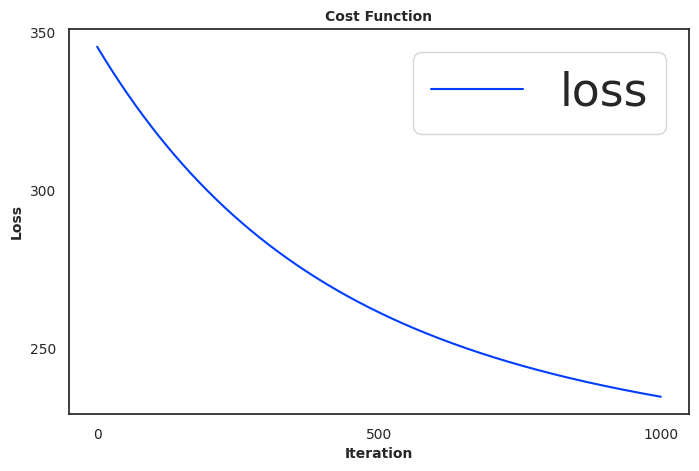

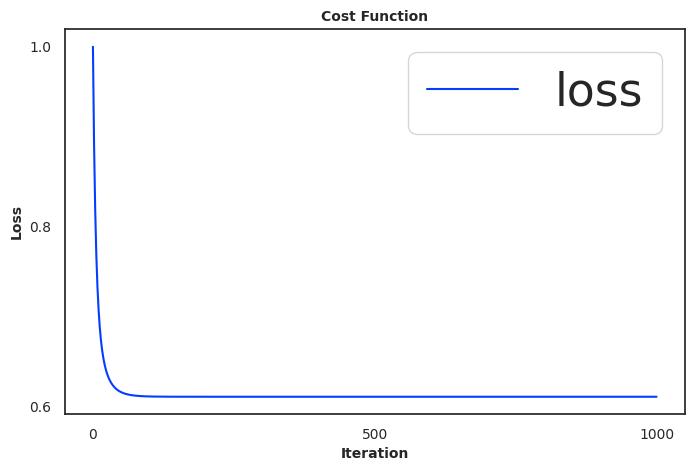

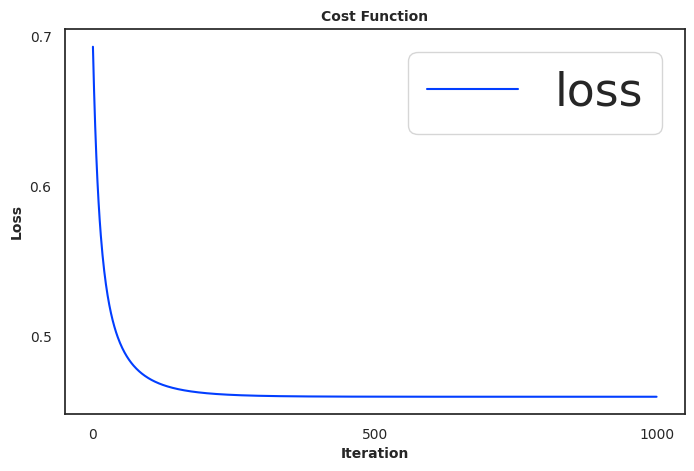

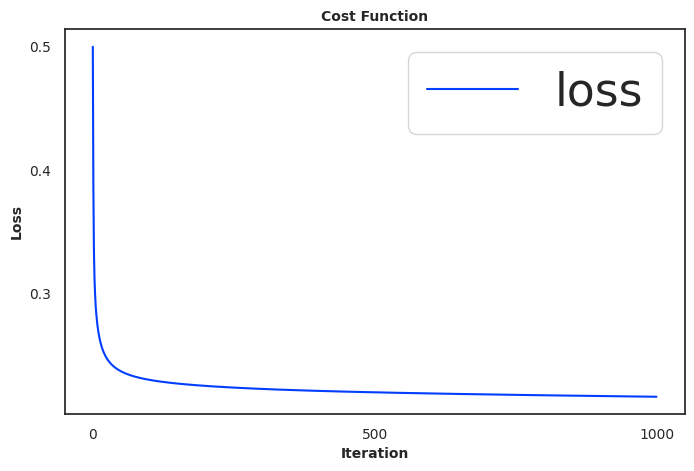

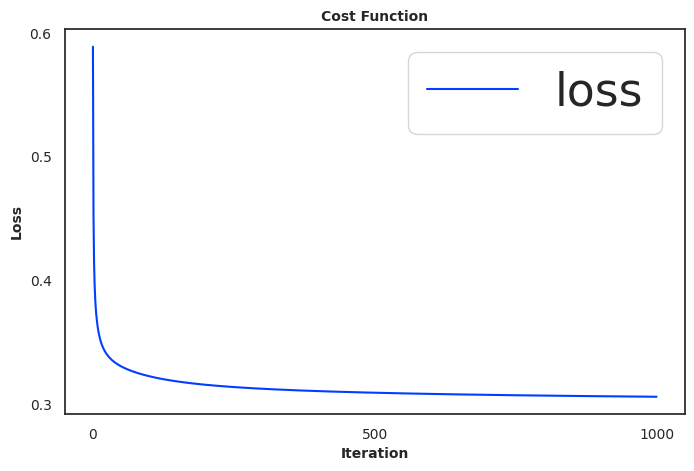

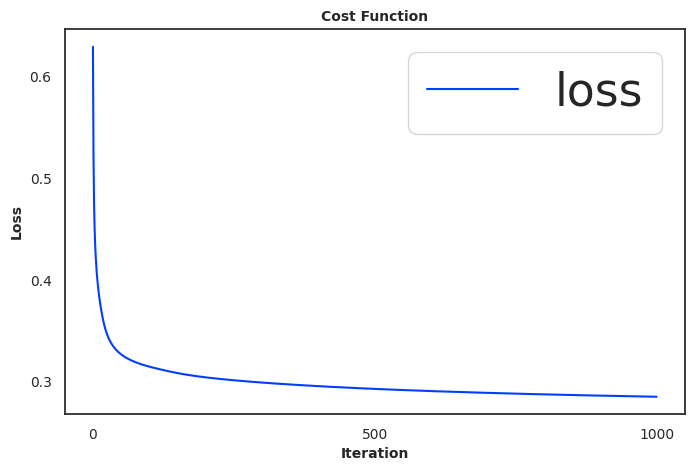

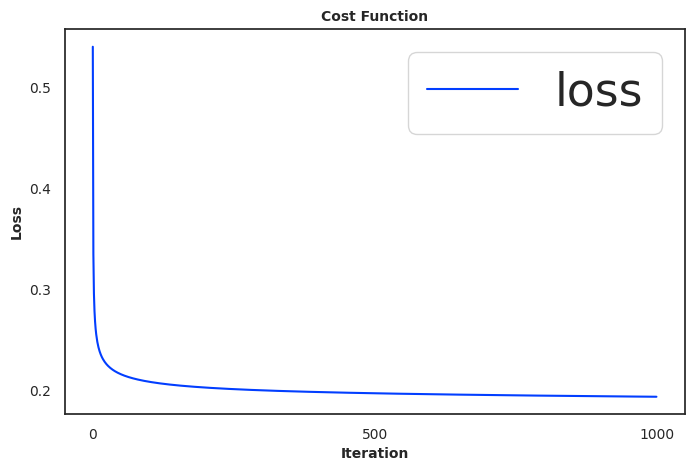

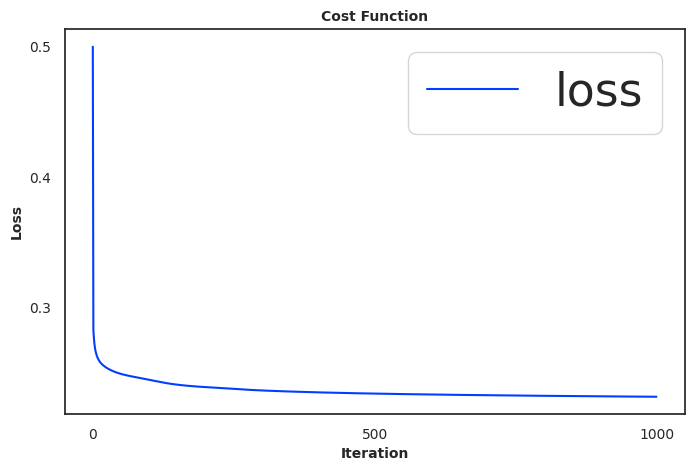

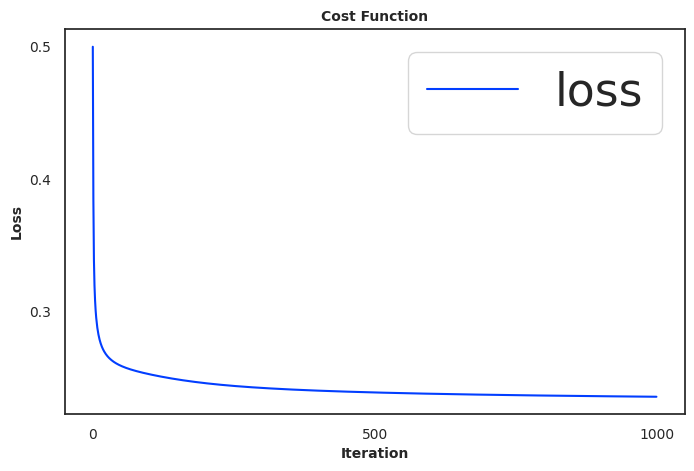

################################################## 2th CV ##################################################


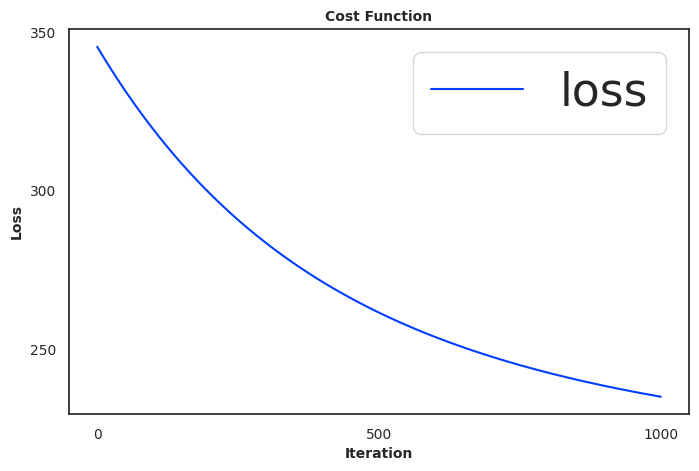

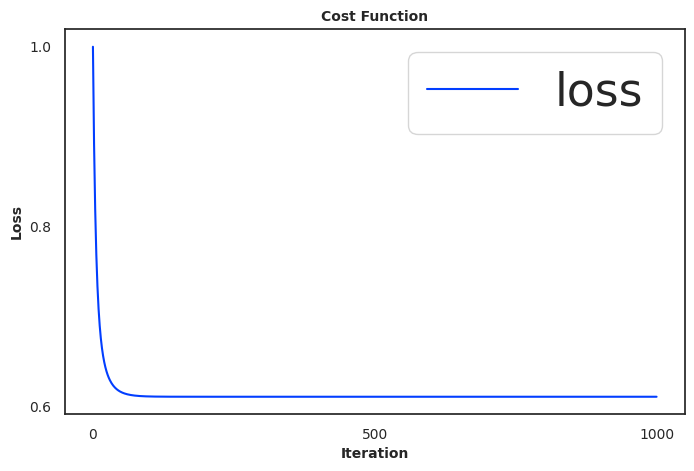

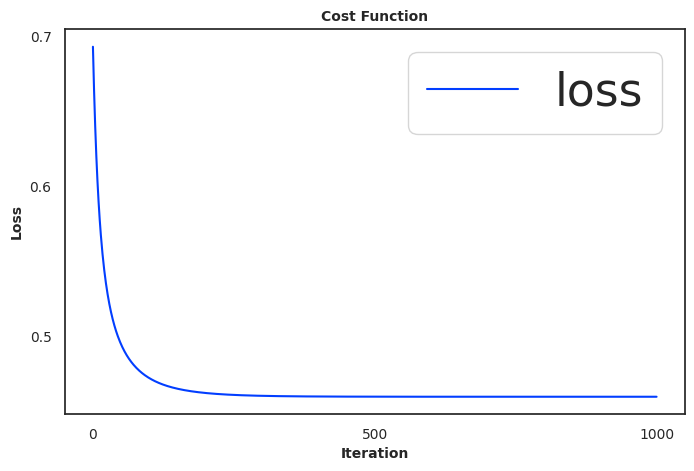

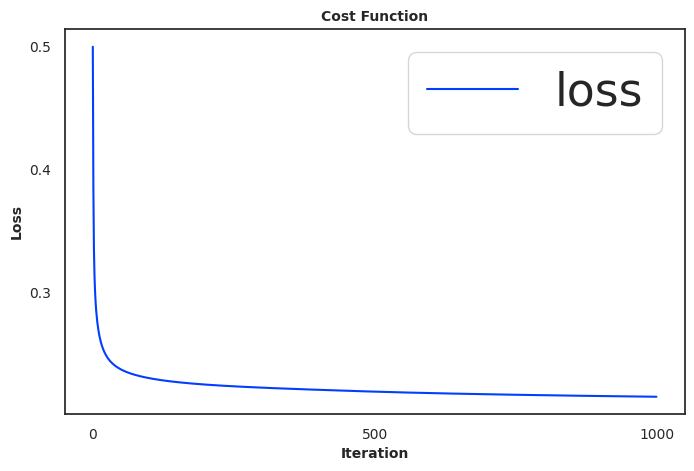

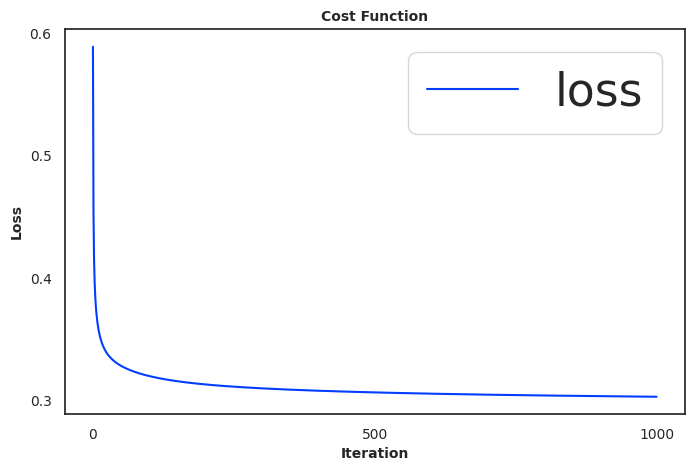

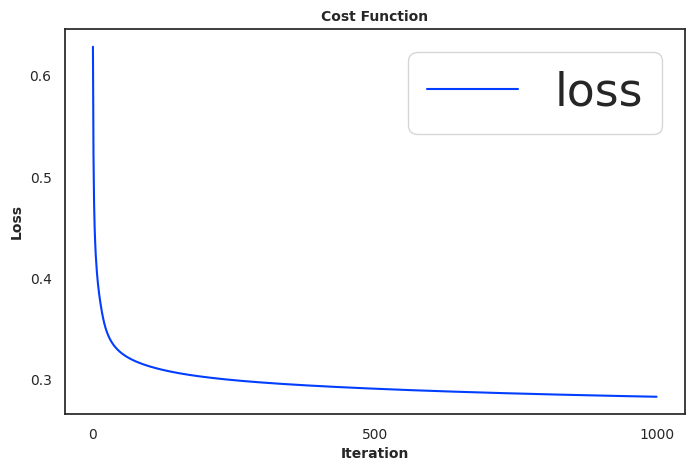

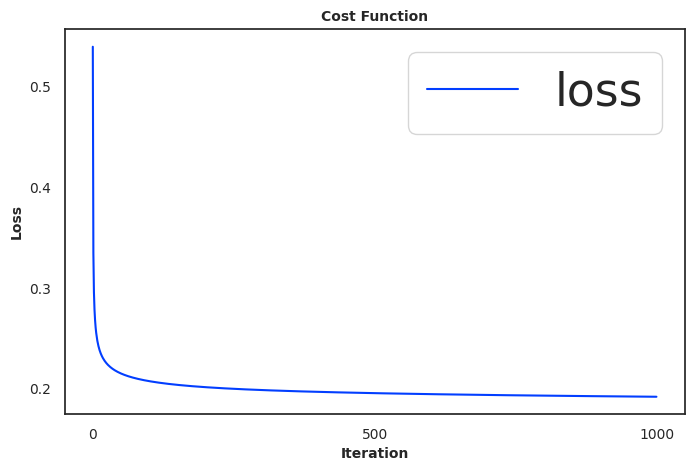

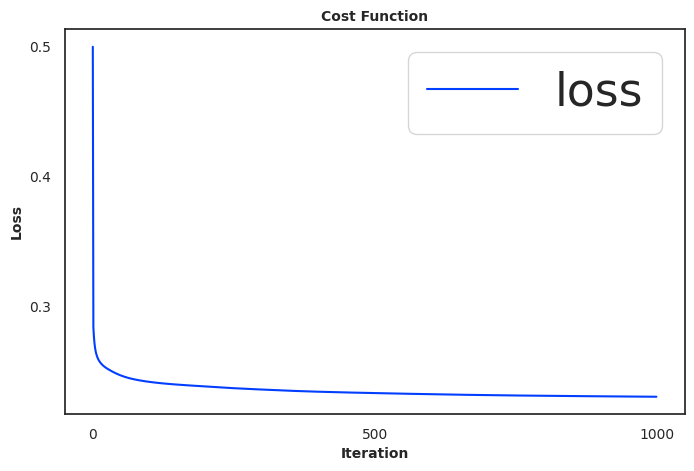

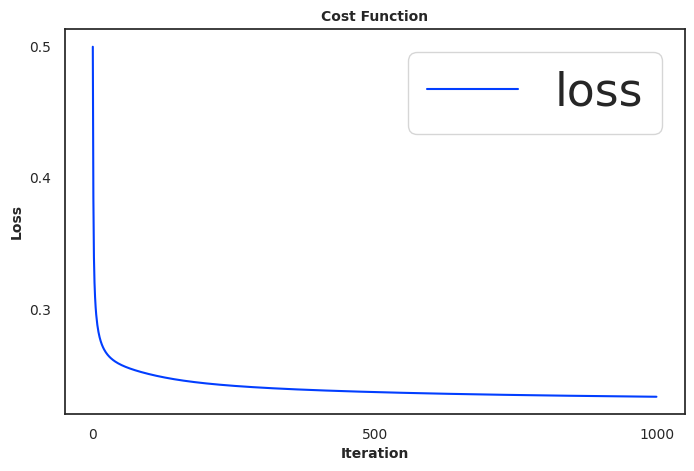

################################################## 3th CV ##################################################


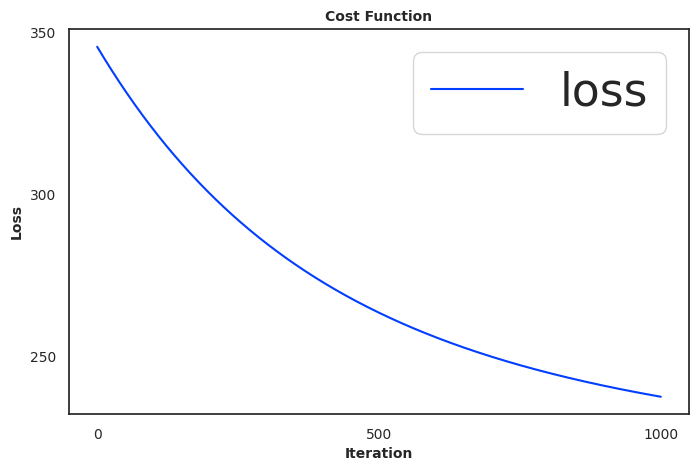

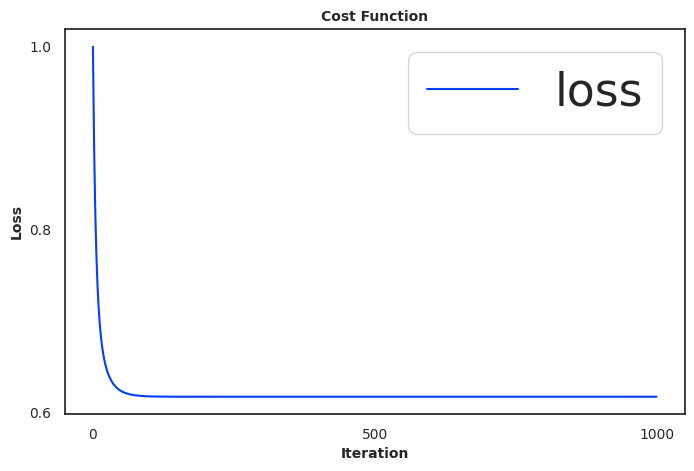

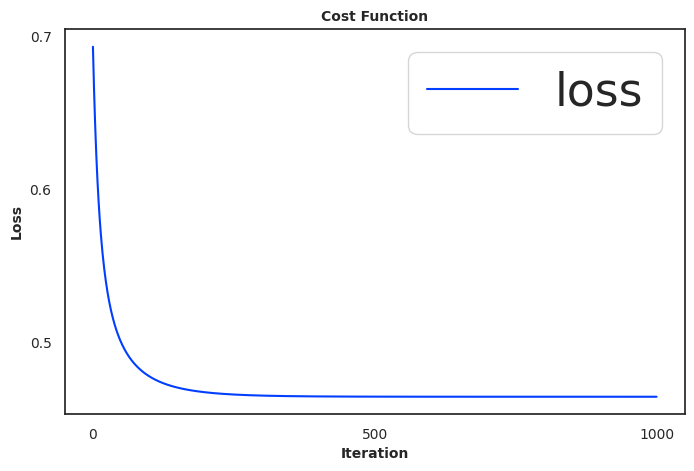

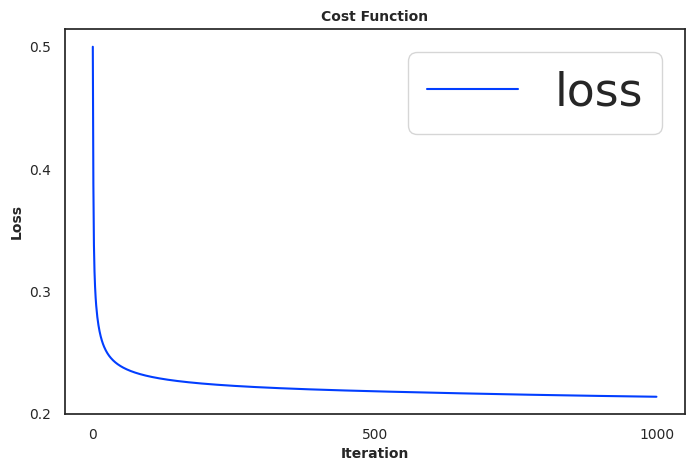

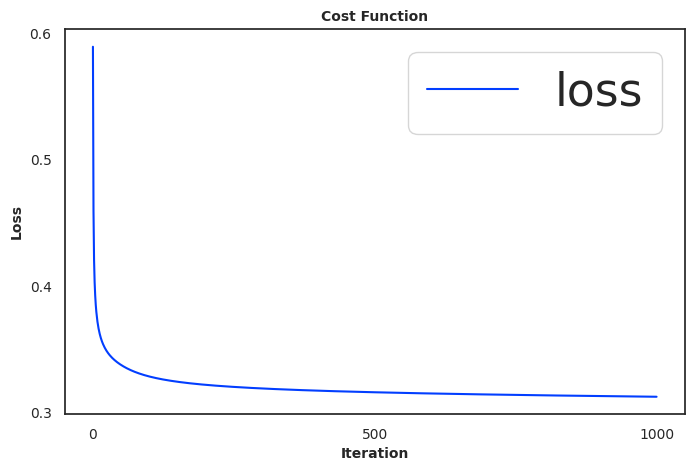

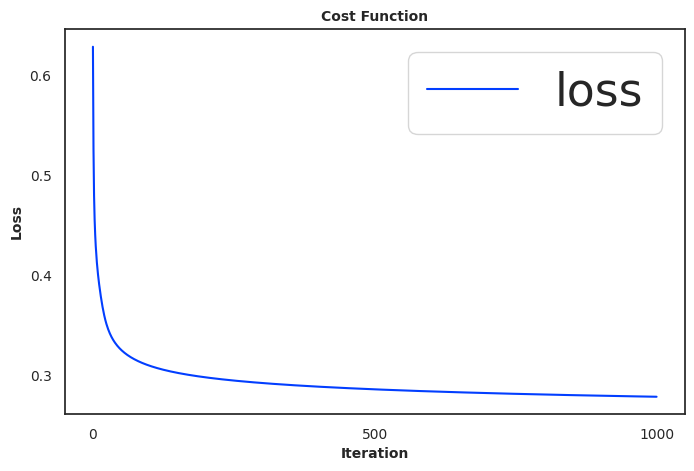

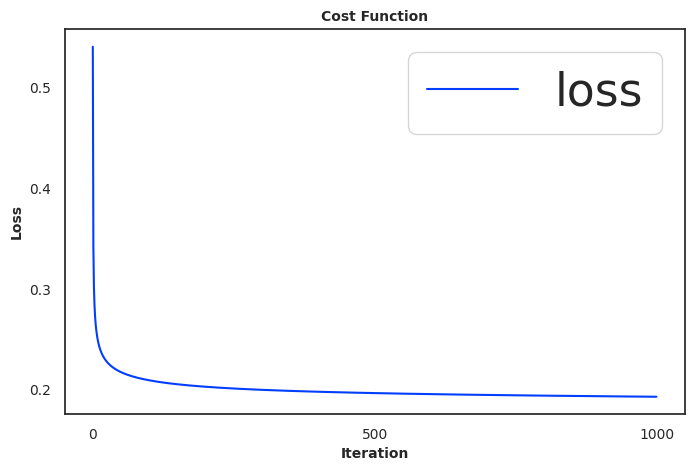

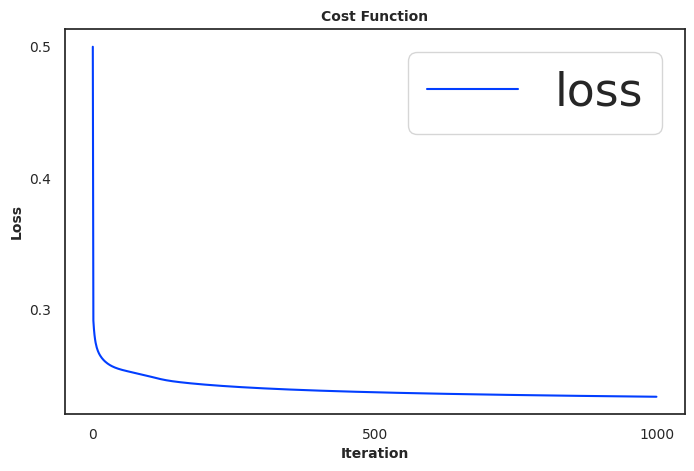

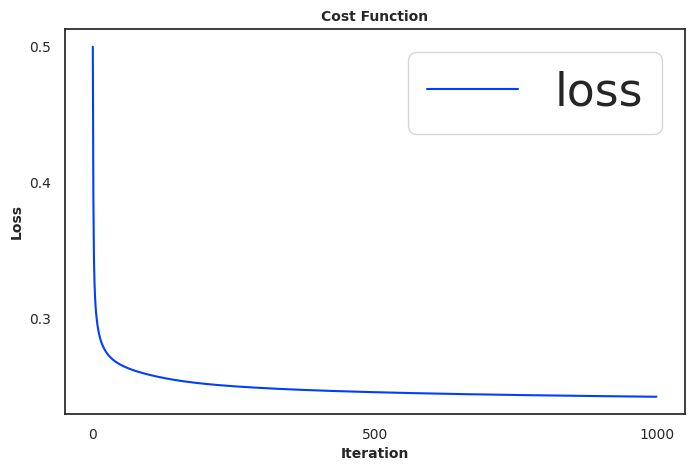

################################################## 4th CV ##################################################


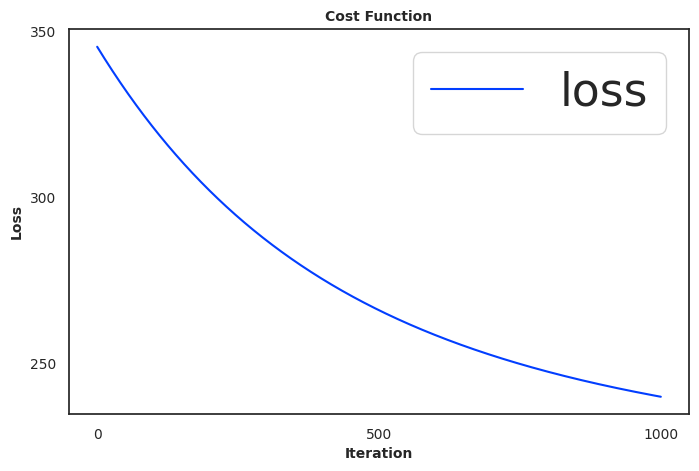

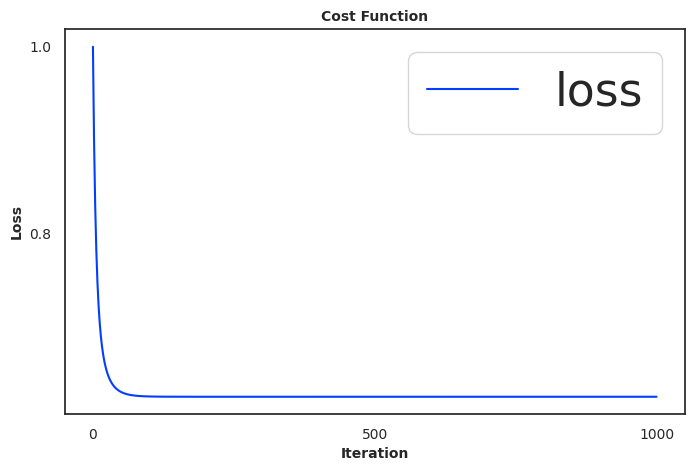

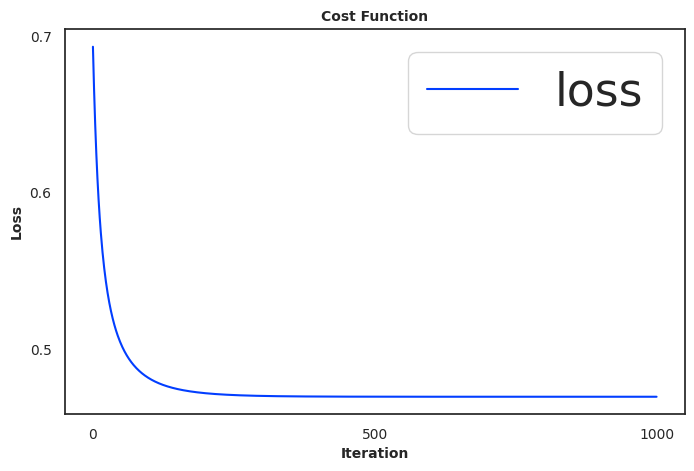

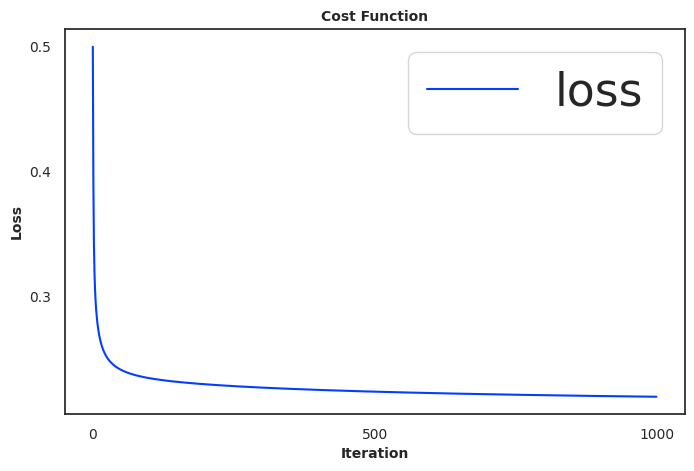

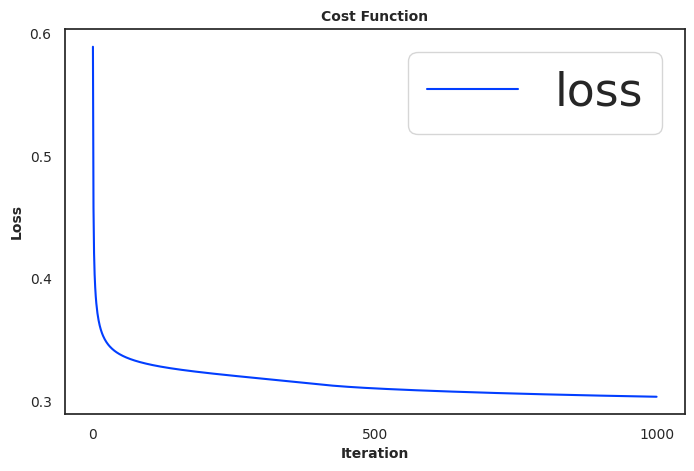

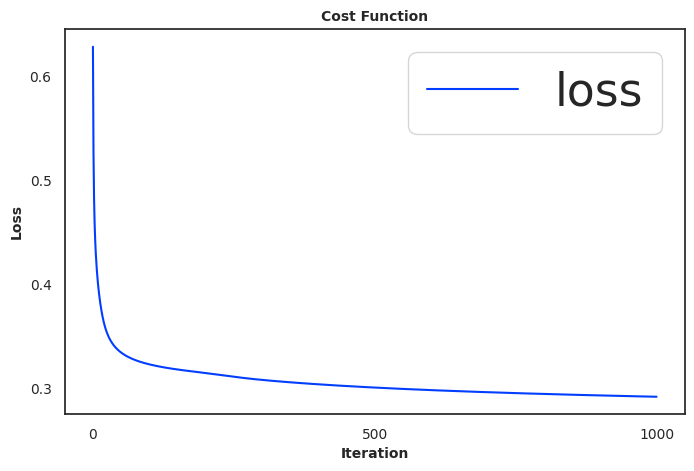

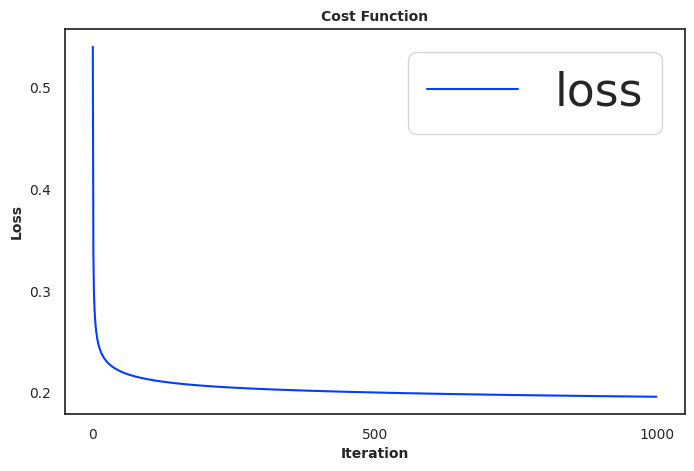

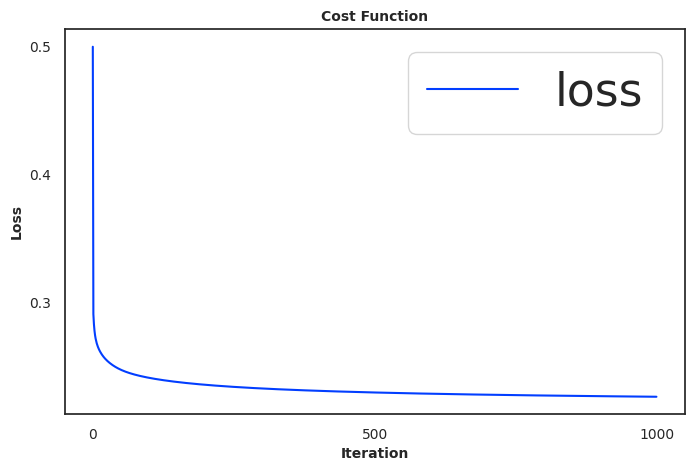

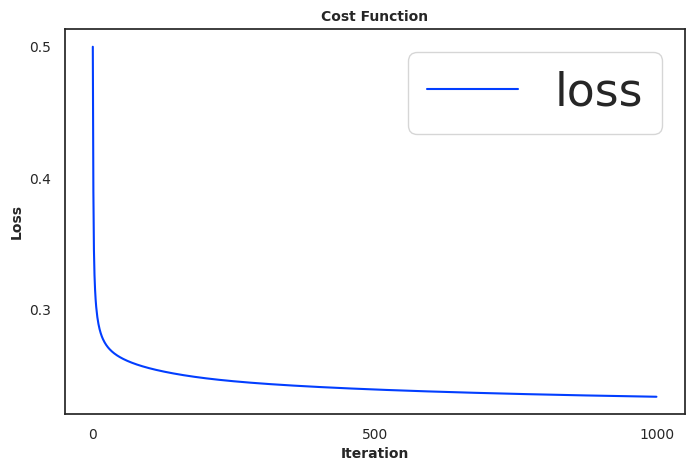

################################################## 5th CV ##################################################


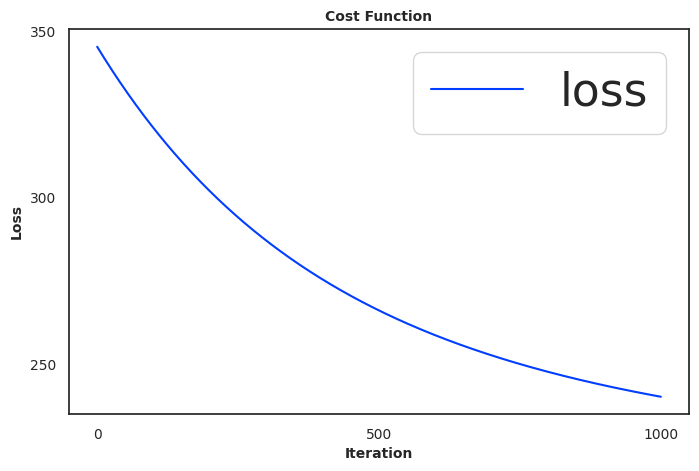

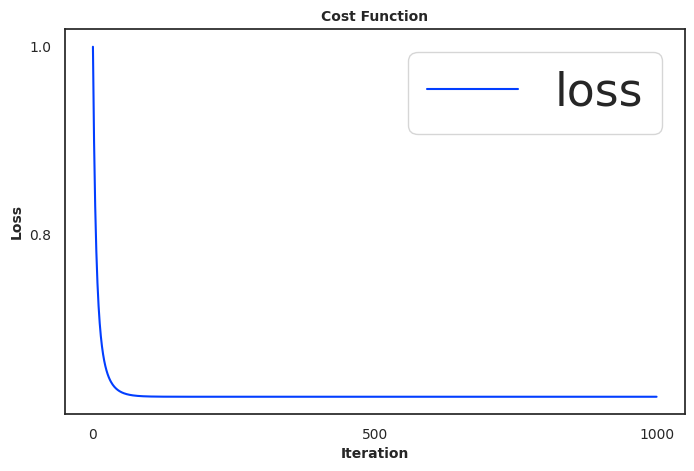

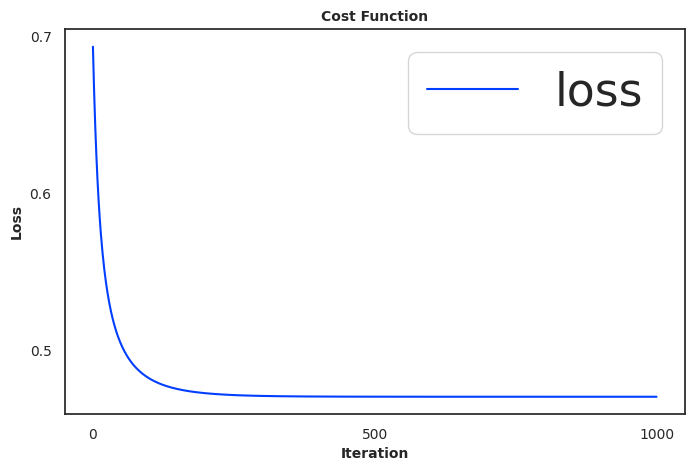

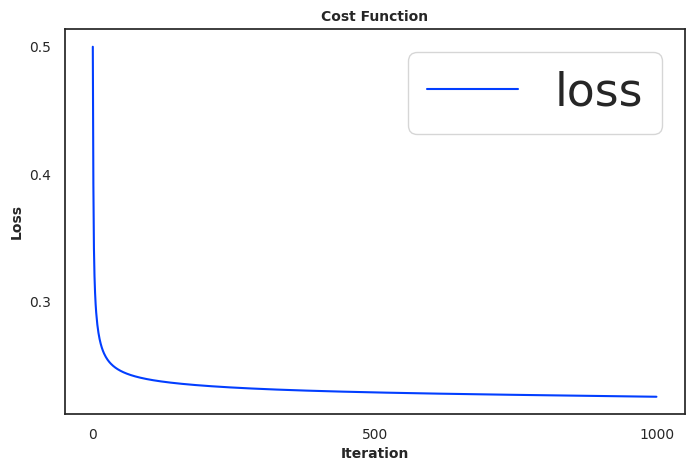

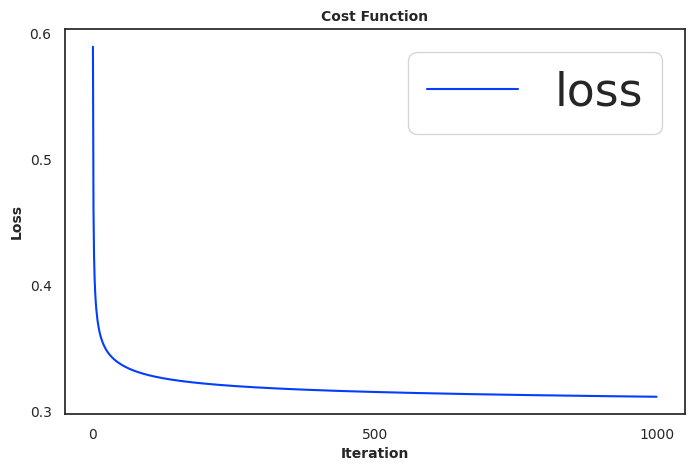

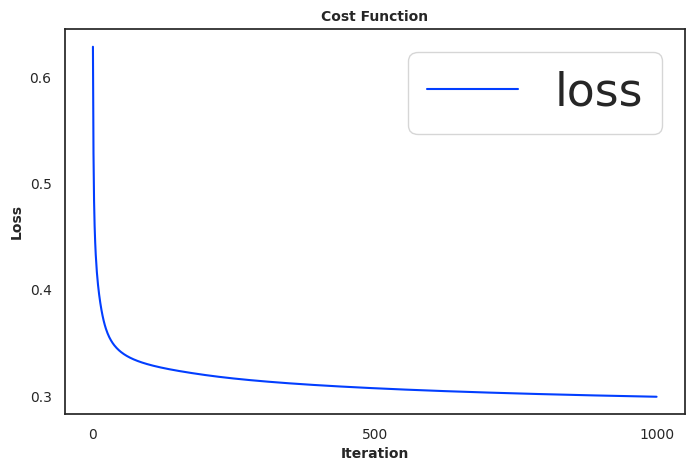

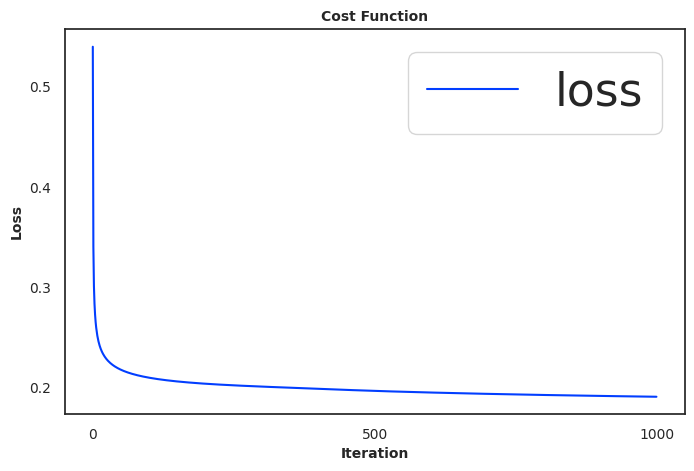

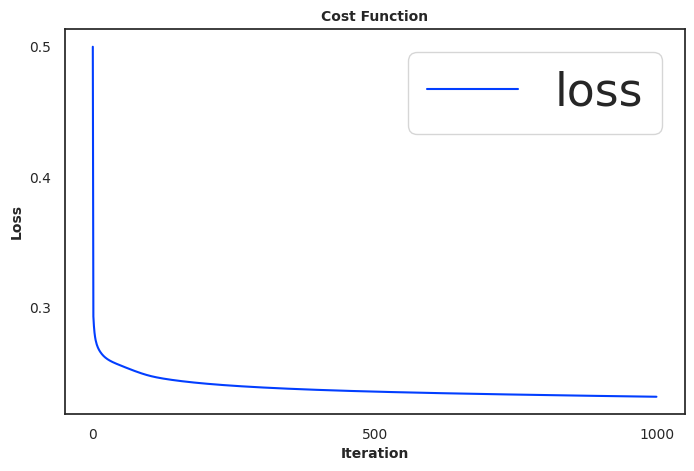

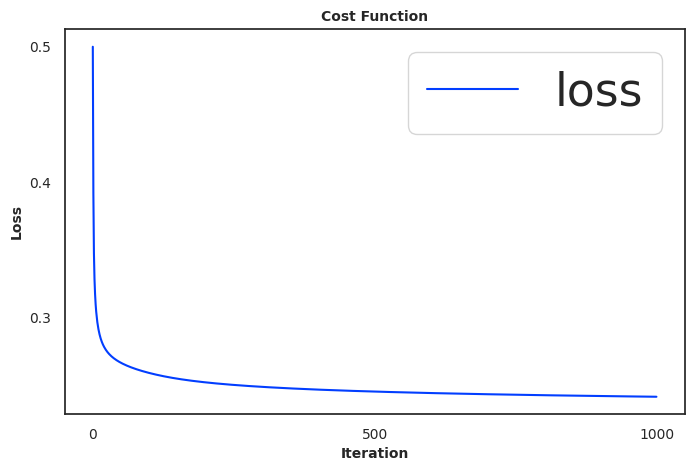

################################################## 6th CV ##################################################


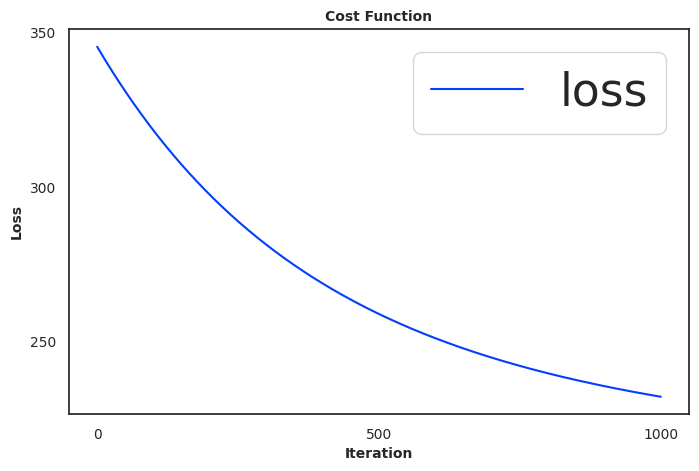

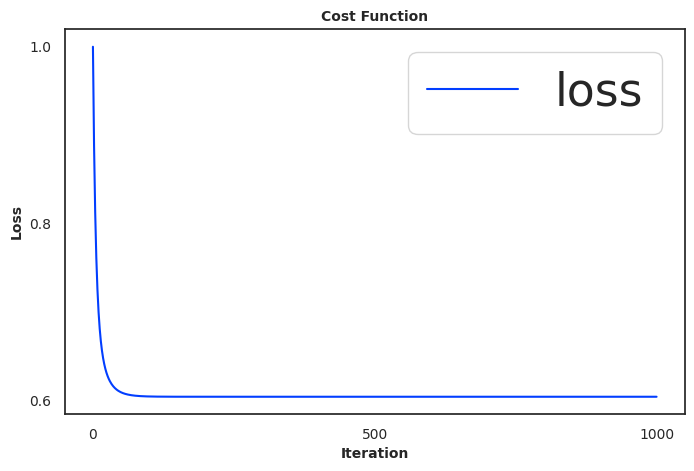

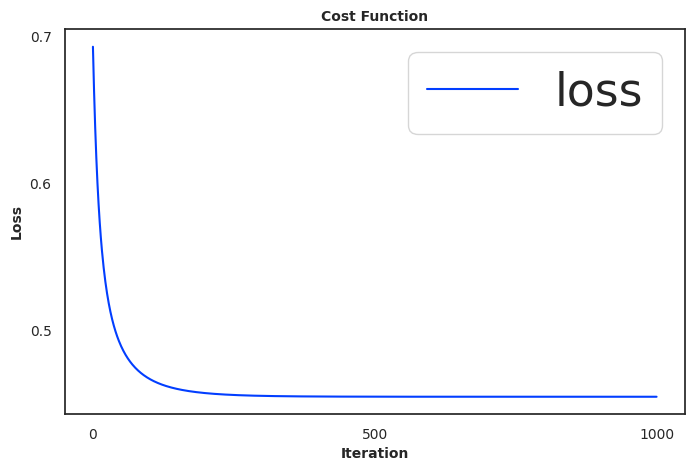

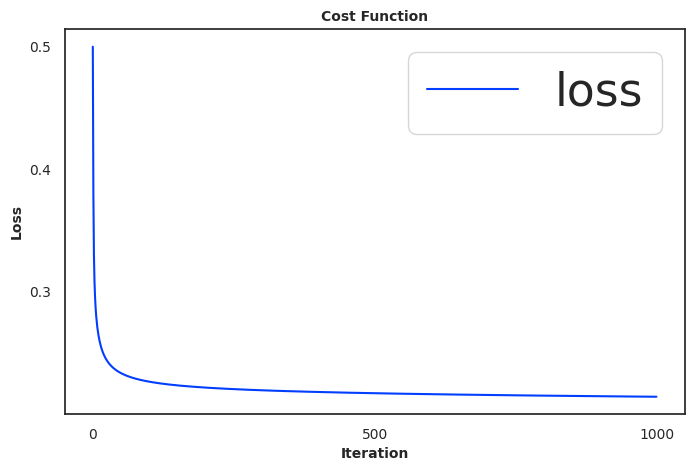

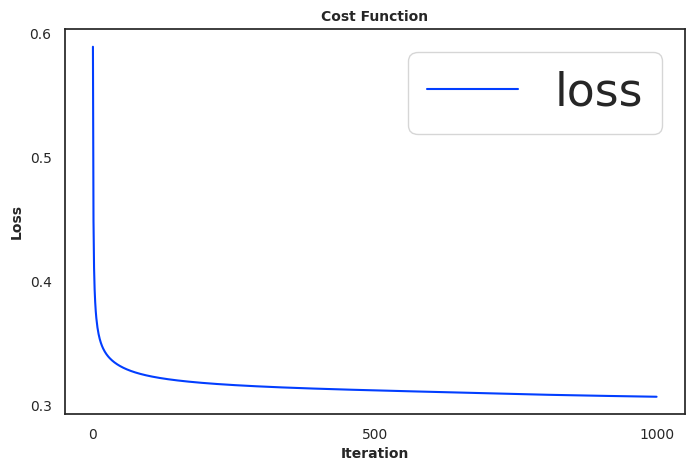

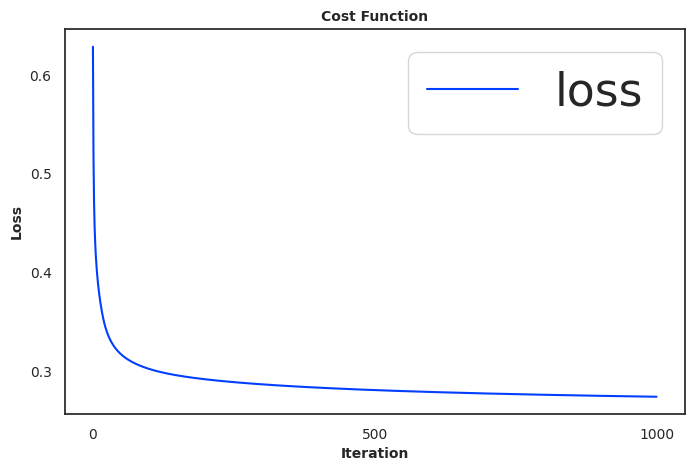

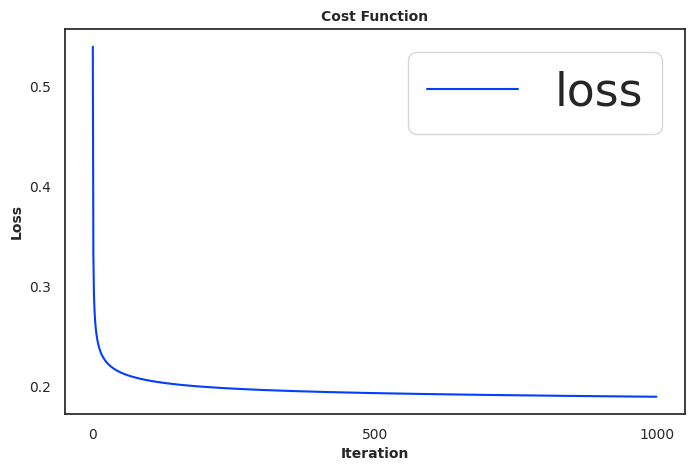

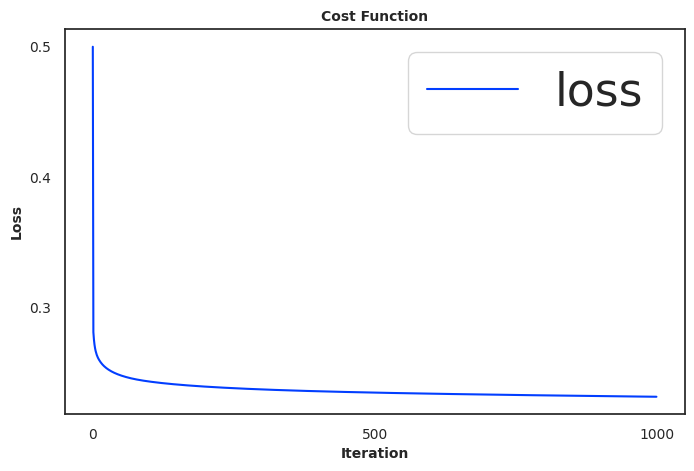

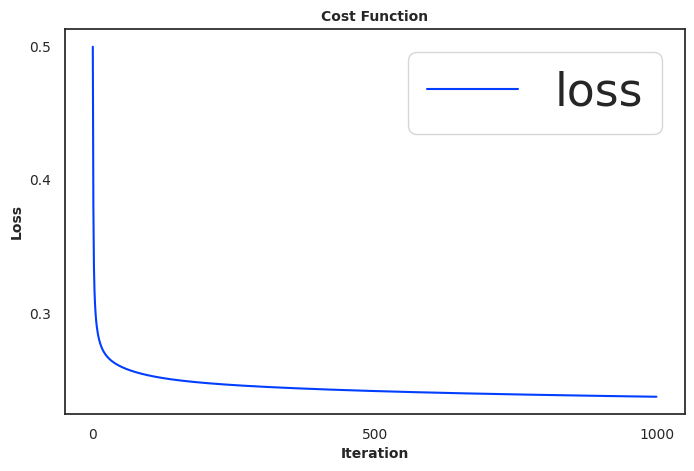

################################################## 7th CV ##################################################


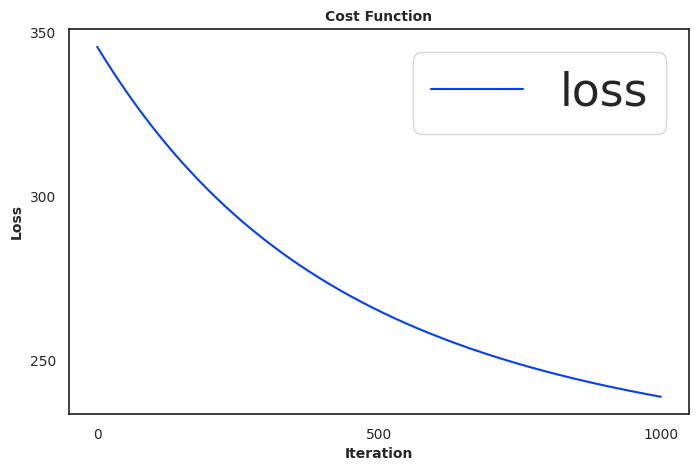

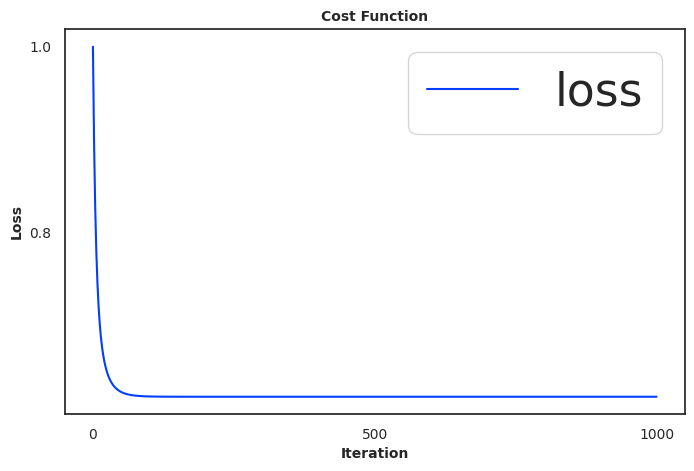

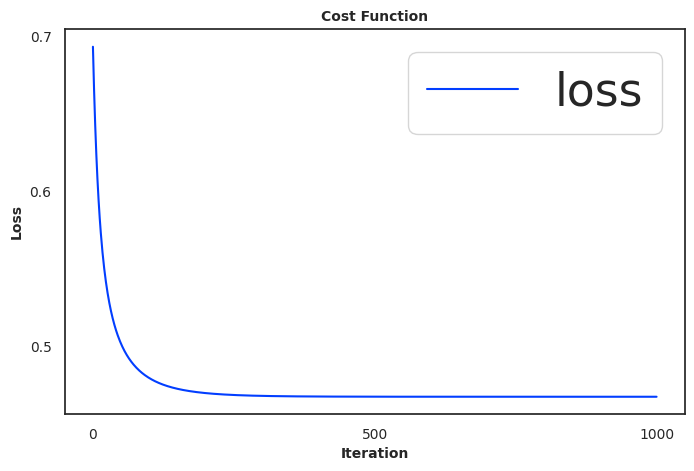

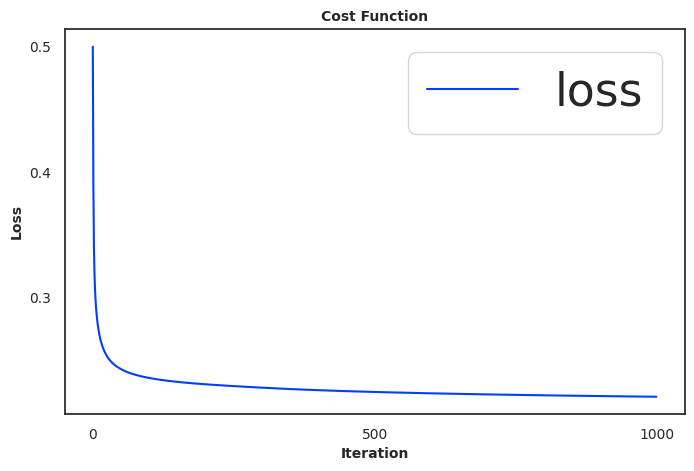

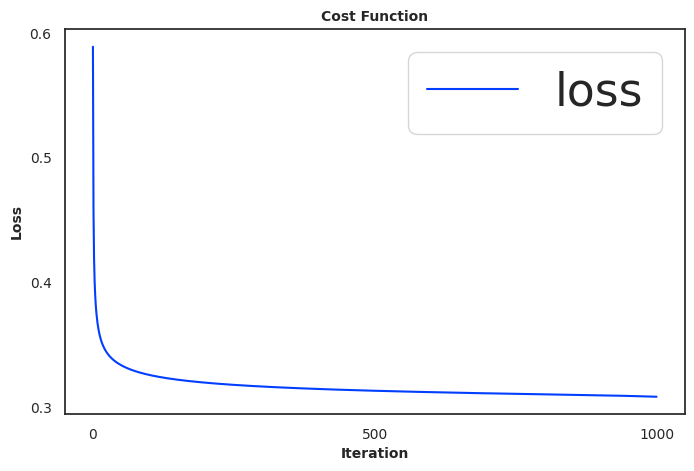

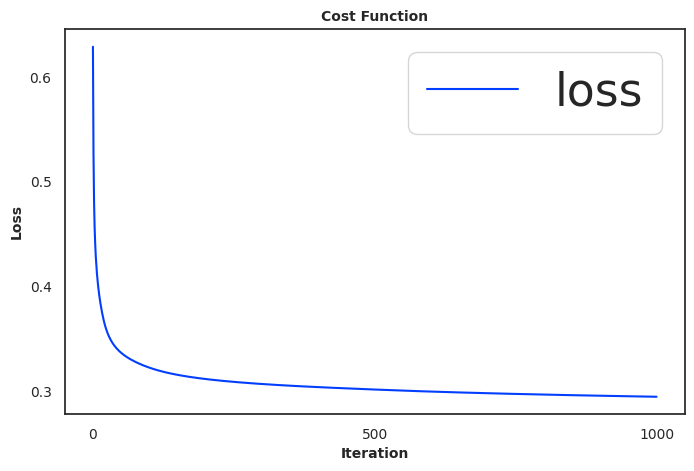

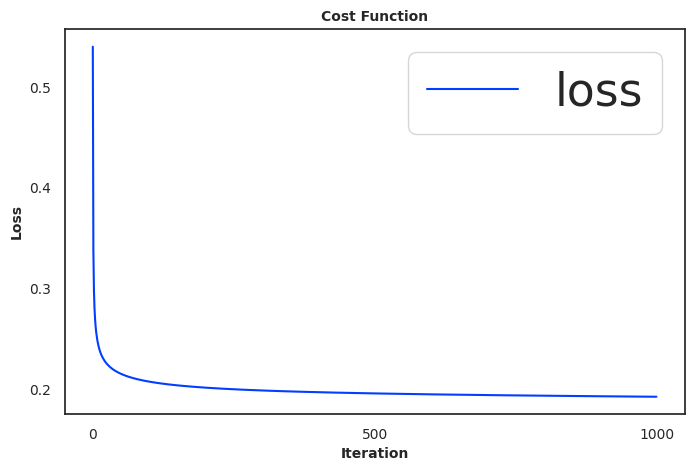

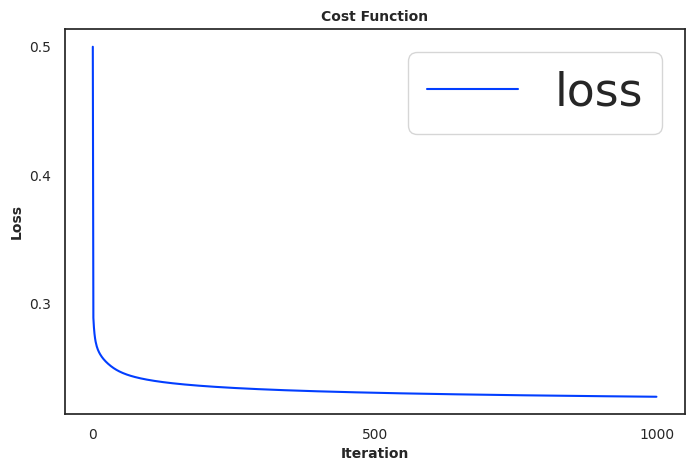

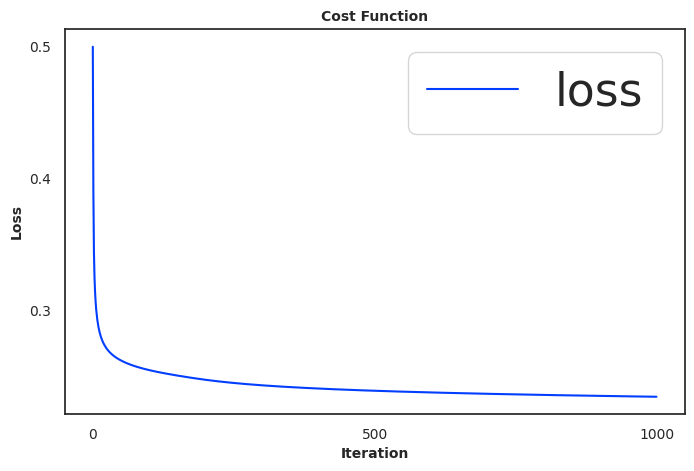

################################################## 8th CV ##################################################


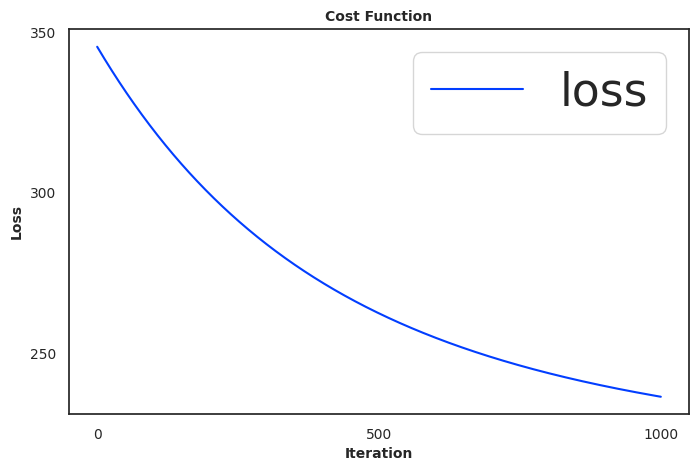

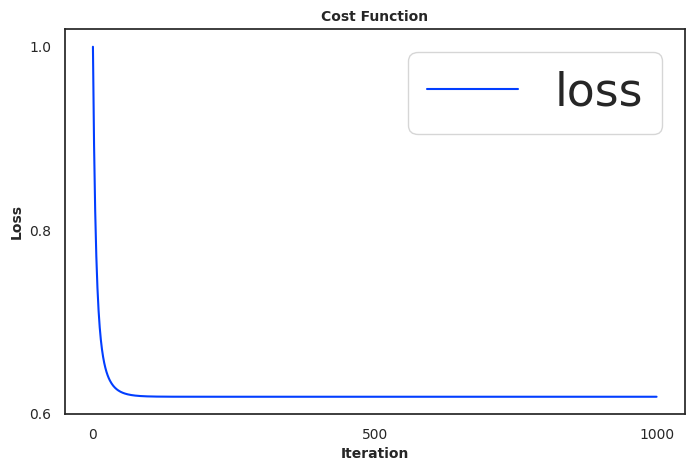

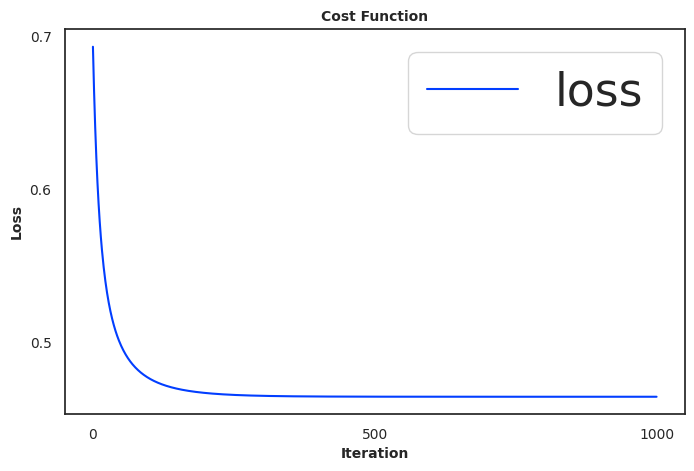

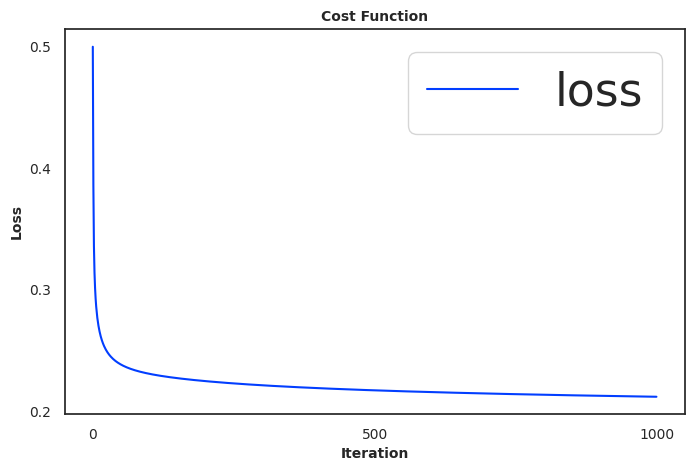

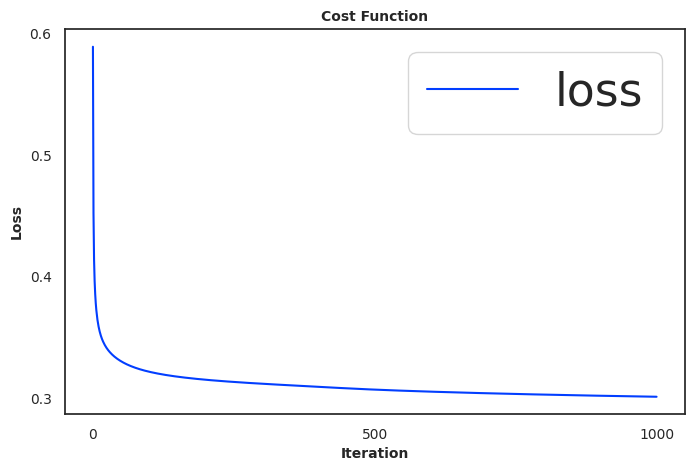

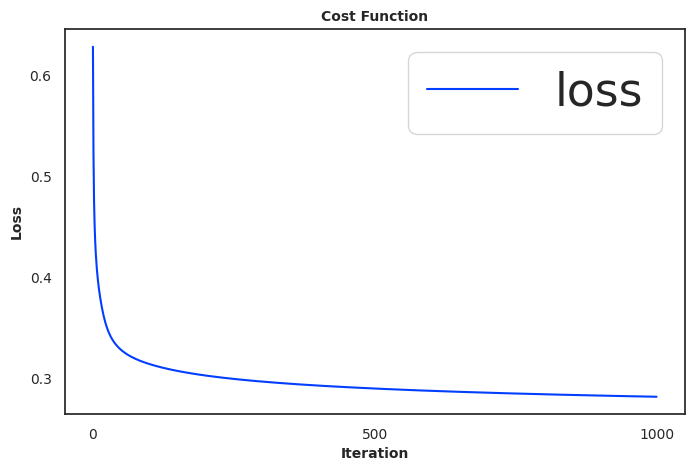

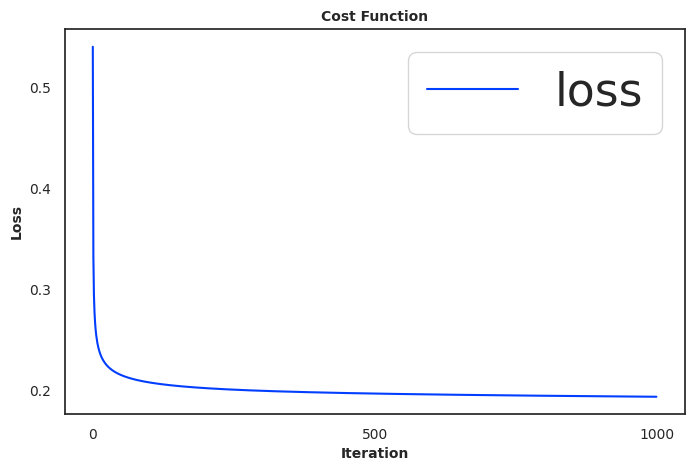

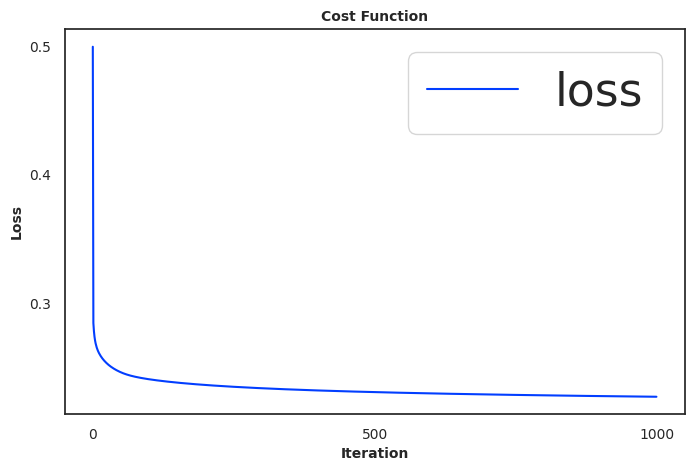

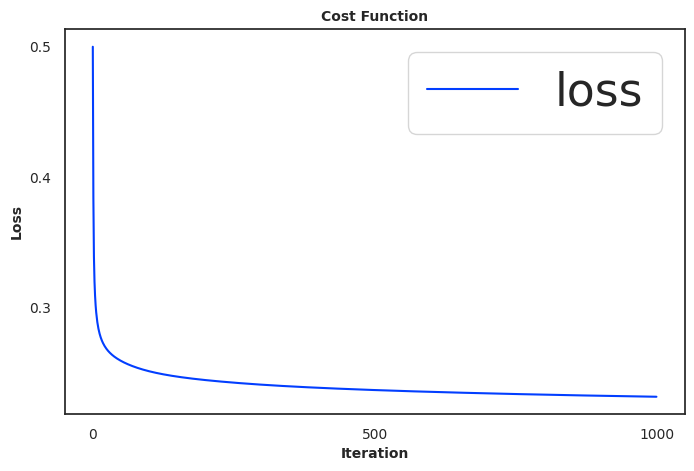

################################################## 9th CV ##################################################


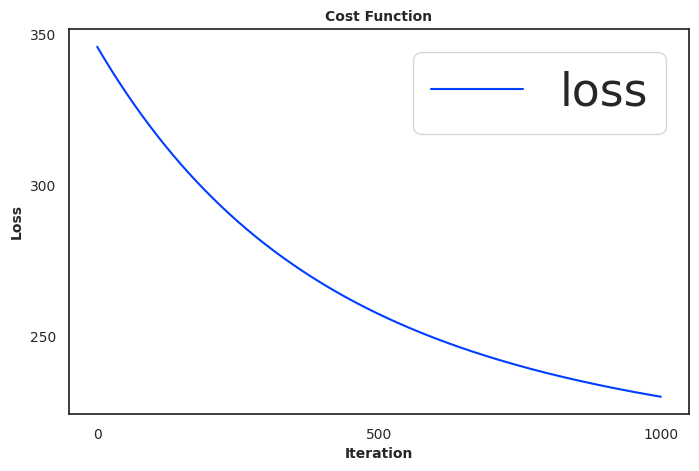

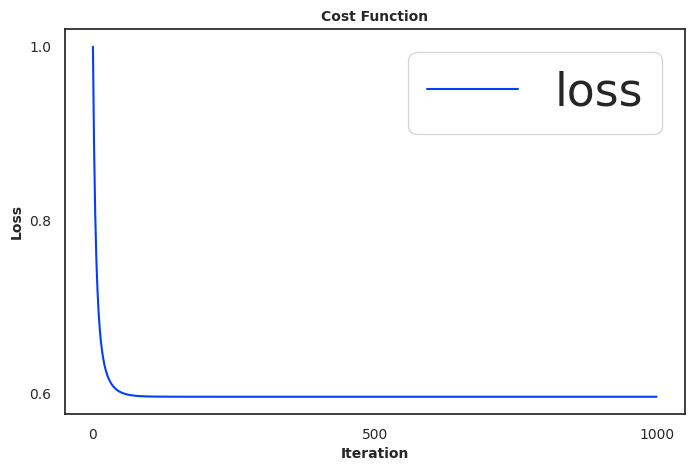

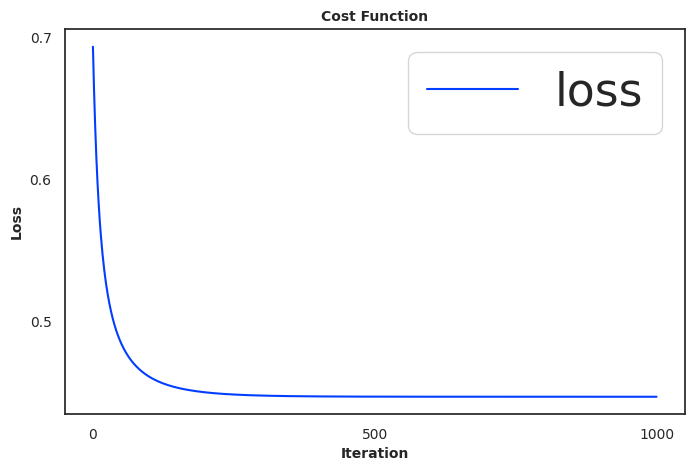

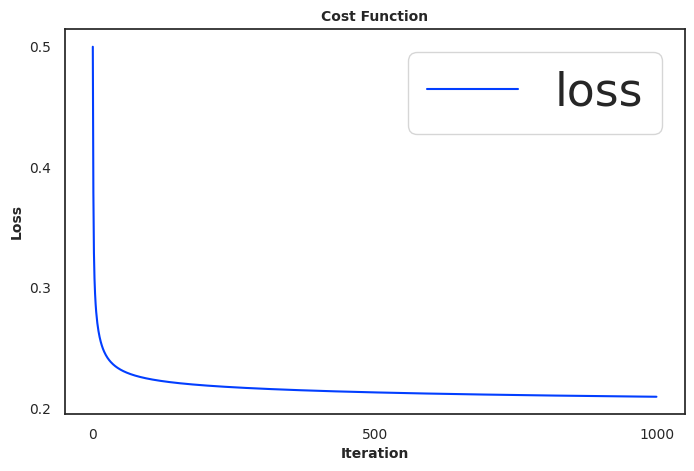

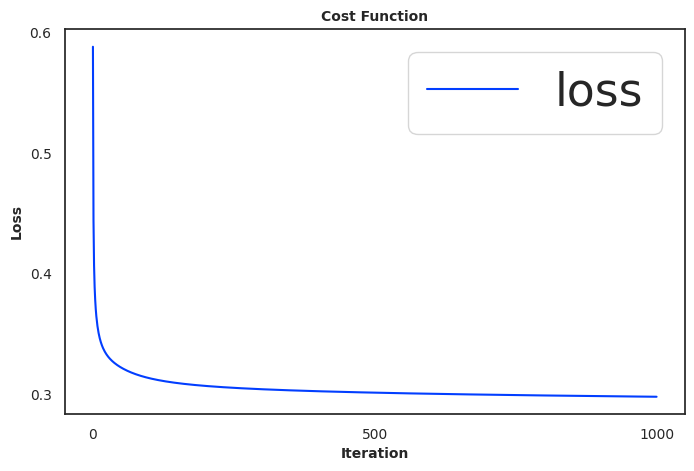

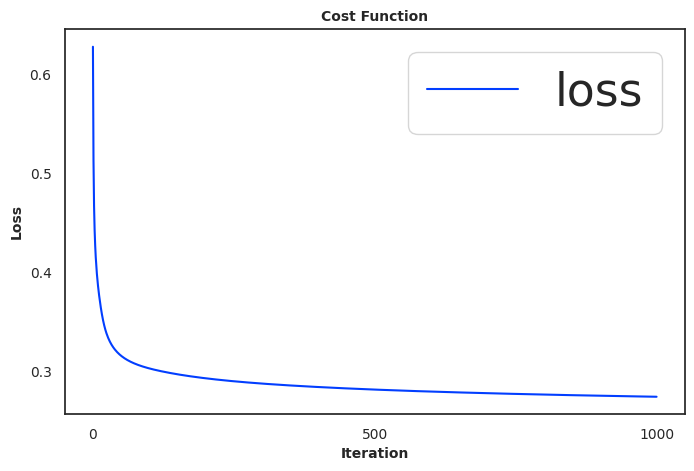

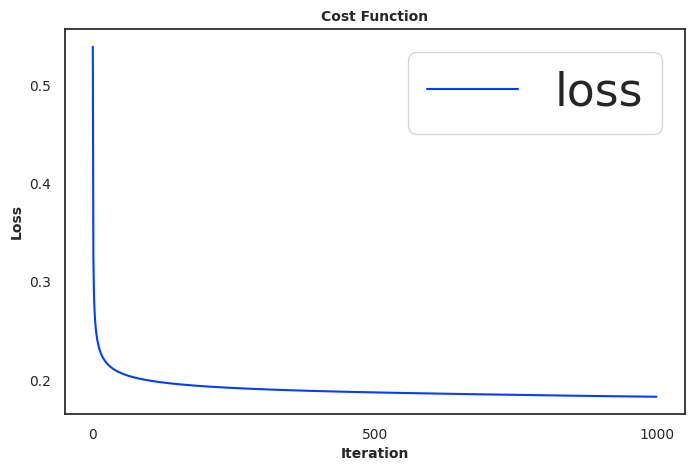

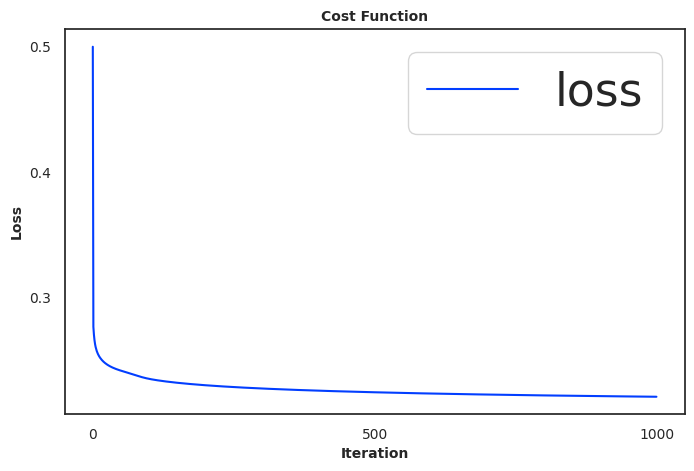

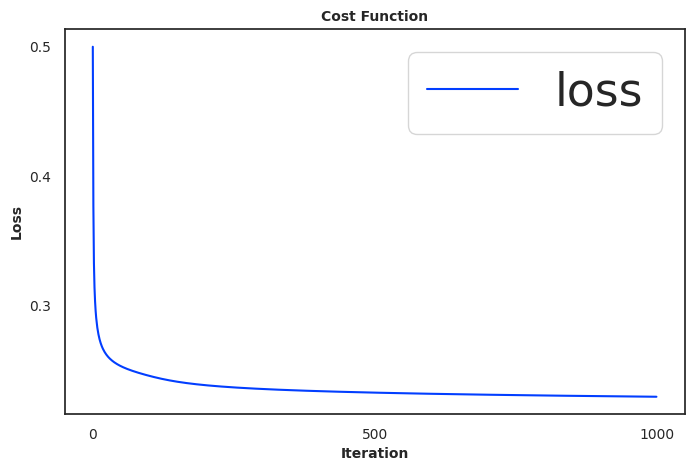

################################################## 10th CV ##################################################


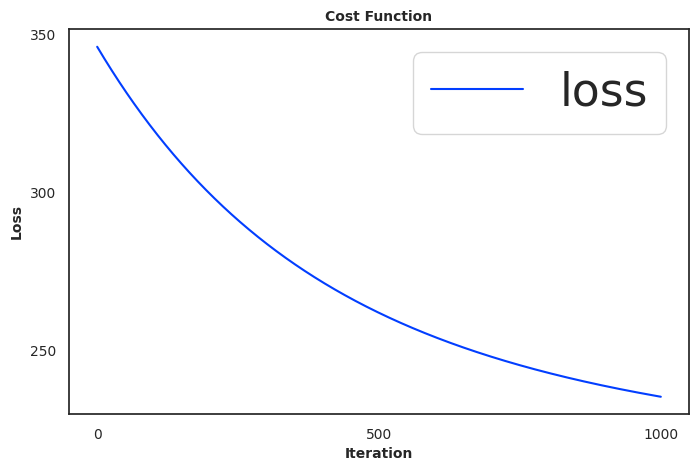

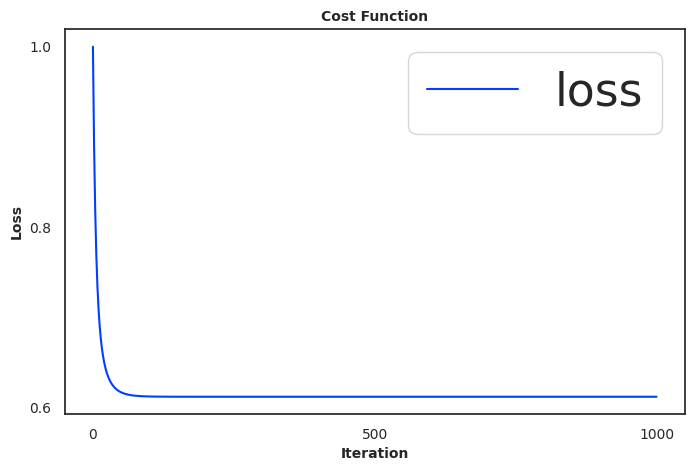

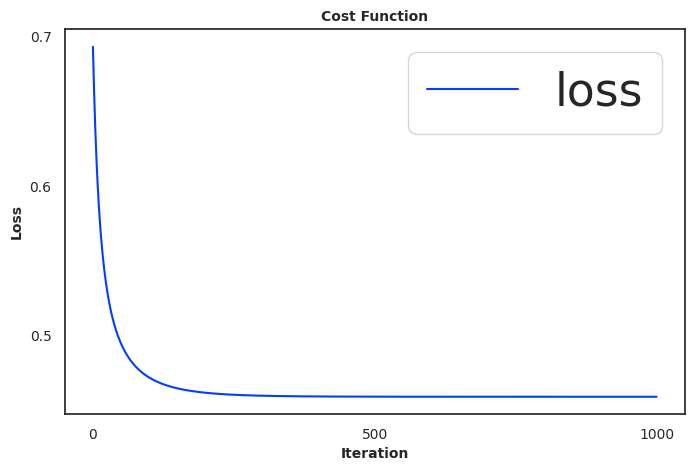

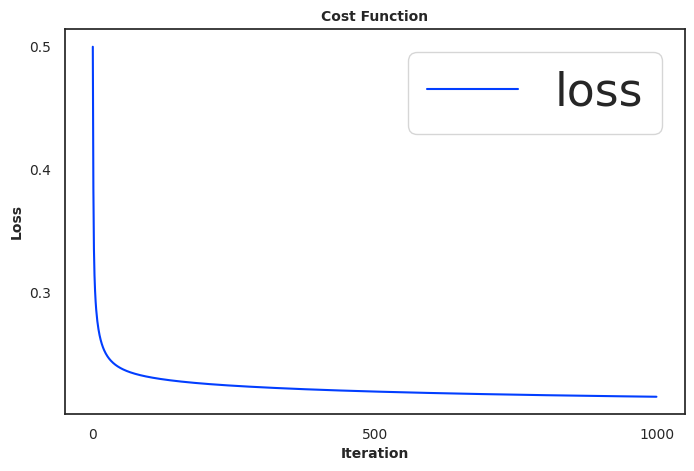

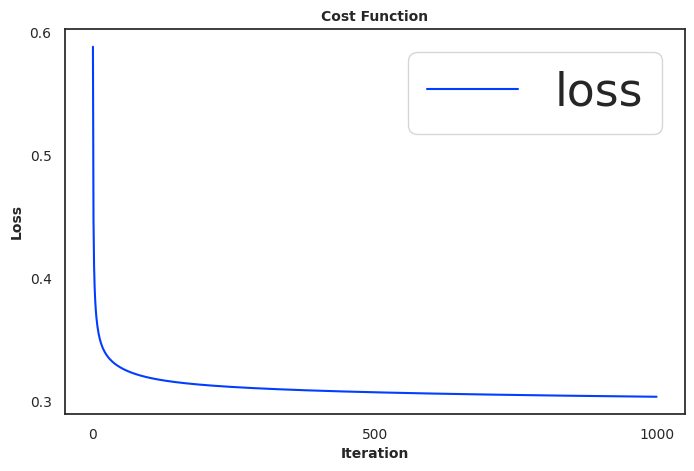

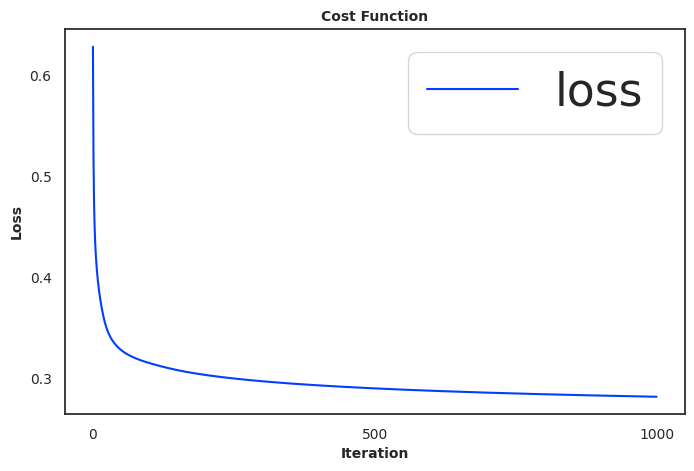

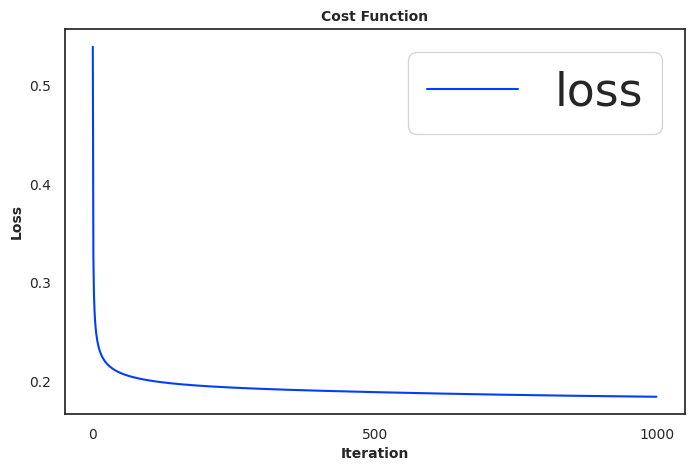

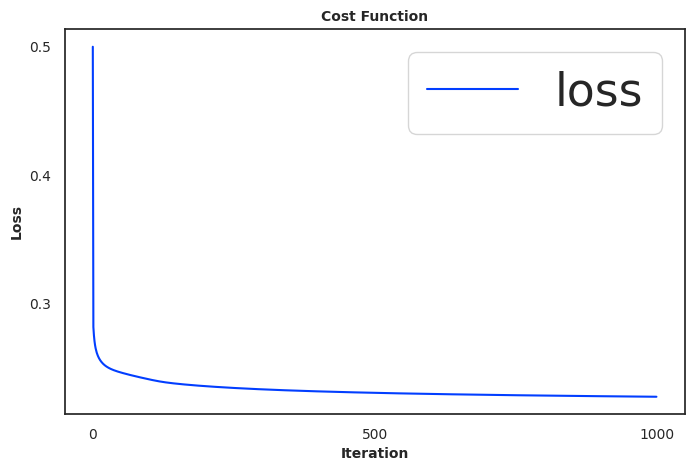

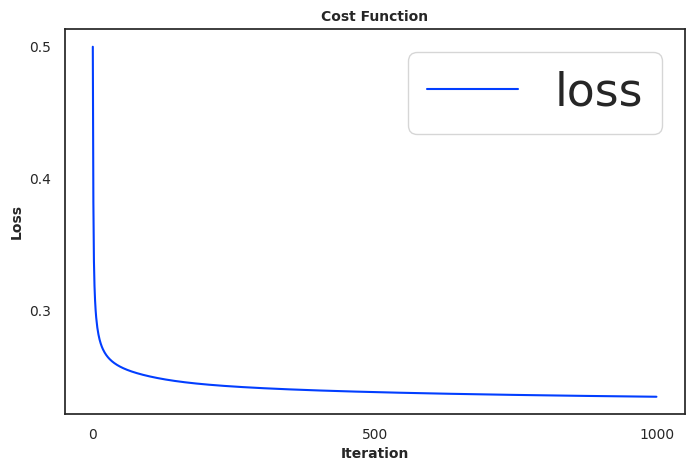

,Delta,MSE,BCE,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
Acc,0.754101,0.773225,0.774972,0.773137,0.717392,0.780182,0.637094,0.747514,0.725492
F1,0.635626,0.636087,0.639947,0.643622,0.661258,0.631516,0.645572,0.689831,0.670169
F.5,0.648794,0.688328,0.691763,0.685708,0.603173,0.701862,0.543693,0.639242,0.612690
F2,0.625737,0.594352,0.598812,0.611331,0.734205,0.578301,0.795587,0.751734,0.742199
Gmean,0.712694,0.706912,0.709821,0.714216,0.729381,0.700396,0.664884,0.756373,0.737306
B_Acc,0.723113,0.726232,0.728701,0.731517,0.735071,0.726612,0.707825,0.759829,0.742958


In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 2)
n_iter=0

X = diab_df.iloc[:, :-1]
y = diab_df.iloc[:, -1]


for train_index, test_index in skf.split(diab_df, diab_df['Outcome']):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = [-1 if x==0 else x for x in y_train]
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = [-1 if x==0 else x for x in y_test]
    intercept_r = np.ones((X_train.shape[0],1))
    intercept_t = np.ones((X_test.shape[0],1))
    X_train_a = np.concatenate((intercept_r,X_train),axis= 1)
    X_test_a = np.concatenate((intercept_t,X_test),axis= 1)

###################### Perceptron(Delta Rule // SSE // Adaline)##############################
    theta = np.zeros(X_train_a.shape[1])
    num_iter = 1000
    cost = []
    lr = 0.000001
    for i in range(num_iter):
        z = linear(X_train_a,theta)
        cost.append(cost_ada(z,y_train))
        gradient = gd_ada(X_train_a,z,y_train)
        theta = update_loss(theta,lr,gradient)
    plot_cost_function(cost)
#     predicted_r = predict(X_train_a,theta)
#     TN = metrics.confusion_matrix(y_train, predicted_r)[0,0]
#     FP = metrics.confusion_matrix(y_train, predicted_r)[0,1]
#     FN = metrics.confusion_matrix(y_train, predicted_r)[1,0]
#     TP = metrics.confusion_matrix(y_train, predicted_r)[1,1]
#     print("TN, FP, FN, TP:", TN, FP, FN, TP)
#     print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
#     print('Precesion =', TP/(TP+FP))
#     print('Recall =', TP/(TP+FN))
#     print('F1 =', TP / (TP + 0.5*(FP+FN)))
#     print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
#     print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
#     print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
#     print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    predicted = predict_ada(X_test_a,theta)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
#     print("TN, FP, FN, TP:", TN, FP, FN, TP)
#     print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    ada_acc.append((TP+TN)/(TP+TN+FP+FN))
#     print('Precesion =', TP/(TP+FP))
#     print('Recall =', TP/(TP+FN))
#     print('F1 =', TP / (TP + 0.5*(FP+FN)))
    ada_f1.append(TP / (TP + 0.5*(FP+FN)))
#     print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    ada_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
#     print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    ada_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
#     print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    ada_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
#     print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    ada_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

###################### Perceptron(Delta Rule // MSE)##############################
    theta = np.zeros(X_train_a.shape[1])
    num_iter = 1000
    cost = []
    lr = 0.05
    for i in range(num_iter):
        z = linear(X_train_a,theta)
        cost.append(cost_ada2(z,y_train))
        gradient = gd_ada2(X_train_a,z,y_train)
        theta = update_loss(theta,lr,gradient)
    plot_cost_function(cost)
    predicted = predict_ada(X_test_a,theta)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    mse_acc.append((TP+TN)/(TP+TN+FP+FN))
    mse_f1.append(TP / (TP + 0.5*(FP+FN)))
    mse_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    mse_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    mse_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    mse_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

###################### Label change (-1 -> 0) ##############################
    y_train = [0 if x==-1 else x for x in y_train]
    y_train = np.array(y_train)
    y_test = [0 if x==-1 else x for x in y_test]
    y_test = np.array(y_test)

    threshold = 0.5

###################### BCE (with Sigmoid) ##############################
    theta = np.zeros(X_train_a.shape[1])
    num_iter = 1000
    cost = []
    lr = 0.1
    yl = y_train.shape[0]
    for i in range(num_iter):
        h = sigmoid(X_train_a,theta)
        cost.append(cost_function(h,y_train))
        gradient = gradient_descent(X_train_a,h,y_train,yl)
        theta = update_loss(theta,lr,gradient)
    plot_cost_function(cost)
    predicted = predict(X_test_a,theta)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    bce_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

###################### Ours(Accuracy) ##############################
    theta = np.zeros(X_train_a.shape[1])
    num_iter = 1000
    lr = 0.01
    L = 73
    cost = []
    sy = np.sum(y_train)
    yl = y_train.shape[0]
    for i in range(num_iter):
        p = sigmoid(X_train_a,theta)
        yh = sigmoid_2(p)
        syh = np.sum(yh)
        syhy = np.dot(yh,y_train)
        cost.append(cost_function_acc(sy,syh,syhy,yl))
        gradient = gradient_descent_acc(p,X_train_a,yh,y_train,yl)
        theta = update_loss(theta,lr,gradient)
    plot_cost_function(cost)
    predicted = predict_ours(X_test_a,theta)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    acc_acc.append((TP+TN)/(TP+TN+FP+FN))
    acc_f1.append(TP / (TP + 0.5*(FP+FN)))
    acc_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    acc_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    acc_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    acc_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

###################### Ours(F1) ##############################
    theta = np.zeros(X_train_a.shape[1])
    num_iter = 1000
    lr = 0.01
    beta = 1
    L = 73
    cost = []
    bs = beta**2
    sy = np.sum(y_train)
    bs_sy = bs*sy
    for i in range(num_iter):
        p = sigmoid(X_train_a,theta)
        yh = sigmoid_2(p)
        syh = np.sum(yh)
        syhy = np.dot(yh,y_train)
        cost.append(cost_function_new(bs,syh,syhy,bs_sy))
        gradient = gradient_descent_new(p,X_train_a,yh,y_train,bs,syh,syhy,bs_sy)
        theta = update_loss(theta,lr,gradient)
    plot_cost_function(cost)
    predicted = predict_ours(X_test_a,theta)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    f1_acc.append((TP+TN)/(TP+TN+FP+FN))
    f1_f1.append(TP / (TP + 0.5*(FP+FN)))
    f1_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    f1_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    f1_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    f1_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

###################### Ours(F0.5) ##############################
    theta = np.zeros(X_train_a.shape[1])
    num_iter = 1000
    lr = 0.01
    beta = 0.5
    L = 73
    cost = []
    bs = beta**2
    sy = np.sum(y_train)
    bs_sy = bs*sy
    for i in range(num_iter):
        p = sigmoid(X_train_a,theta)
        yh = sigmoid_2(p)
        syh = np.sum(yh)
        syhy = np.dot(yh,y_train)
        cost.append(cost_function_new(bs,syh,syhy,bs_sy))
        gradient = gradient_descent_new(p,X_train_a,yh,y_train,bs,syh,syhy,bs_sy)
        theta = update_loss(theta,lr,gradient)
    plot_cost_function(cost)
    predicted = predict_ours(X_test_a,theta)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    f05_acc.append((TP+TN)/(TP+TN+FP+FN))
    f05_f1.append(TP / (TP + 0.5*(FP+FN)))
    f05_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    f05_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    f05_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    f05_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

###################### Ours(F2) ##############################
    theta = np.zeros(X_train_a.shape[1])
    num_iter = 1000
    lr = 0.01
    beta = 2
    L = 73
    cost = []
    bs = beta**2
    sy = np.sum(y_train)
    bs_sy = bs*sy
    for i in range(num_iter):
        p = sigmoid(X_train_a,theta)
        yh = sigmoid_2(p)
        syh = np.sum(yh)
        syhy = np.dot(yh,y_train)
        cost.append(cost_function_new(bs,syh,syhy,bs_sy))
        gradient = gradient_descent_new(p,X_train_a,yh,y_train,bs,syh,syhy,bs_sy)
        theta = update_loss(theta,lr,gradient)
    plot_cost_function(cost)
    predicted = predict_ours(X_test_a,theta)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    f2_acc.append((TP+TN)/(TP+TN+FP+FN))
    f2_f1.append(TP / (TP + 0.5*(FP+FN)))
    f2_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    f2_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    f2_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    f2_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

###################### Ours(Gmean) ##############################
    theta = np.zeros(X_train_a.shape[1])
    num_iter = 1000
    lr = 0.01
    L = 73
    cost = []
    sy = np.sum(y_train)
    yl = y_train.shape[0]
    for i in range(num_iter):
        p = sigmoid(X_train_a,theta)
        yh = sigmoid_2(p)
        syh = np.sum(yh)
        syhy = np.dot(yh,y_train)
        cost.append(cost_function_gmean(sy,syh,syhy,yl))
        gradient = gradient_descent_gmean(p,X_train_a,yh,y_train,sy,syh,syhy,yl)
        theta = update_loss(theta,lr,gradient)
    plot_cost_function(cost)
    predicted = predict_ours(X_test_a,theta)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    gmean_acc.append((TP+TN)/(TP+TN+FP+FN))
    gmean_f1.append(TP / (TP + 0.5*(FP+FN)))
    gmean_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    gmean_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    gmean_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    gmean_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

###################### Ours(Balanced Accuracy) ##############################
    theta = np.zeros(X_train_a.shape[1])
    num_iter = 1000
    lr = 0.01
    L = 73
    cost = []
    sy = np.sum(y_train)
    yl = y_train.shape[0]
    for i in range(num_iter):
        p = sigmoid(X_train_a,theta)
        yh = sigmoid_2(p)
        syh = np.sum(yh)
        syhy = np.dot(yh,y_train)
        cost.append(cost_function_balacc(sy,syh,syhy,yl))
        gradient = gradient_descent_balacc(p,X_train_a,yh,y_train,sy,yl)
        theta = update_loss(theta,lr,gradient)
    plot_cost_function(cost)
    predicted = predict_ours(X_test_a,theta)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    bacc_acc.append((TP+TN)/(TP+TN+FP+FN))
    bacc_f1.append(TP / (TP + 0.5*(FP+FN)))
    bacc_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bacc_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bacc_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bacc_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))


###################### Results ##############################

res = pd.DataFrame({'Delta':[0, 0, 0, 0, 0, 0],
                    'MSE':[0, 0, 0, 0, 0, 0],
                    'BCE':[0, 0, 0, 0, 0, 0],
                    'AccAim':[0, 0, 0, 0, 0, 0],
                    'F1Aim':[0, 0, 0, 0, 0, 0],
                    'F.5Aim':[0, 0, 0, 0, 0, 0],
                    'F2Aim':[0, 0, 0, 0, 0, 0],
                    'GAim':[0, 0, 0, 0, 0, 0],
                    'BAim':[0, 0, 0, 0, 0, 0]}, index = ['Acc','F1','F.5','F2','Gmean','B_Acc'])

res['Delta'] = [np.mean(ada_acc), np.mean(ada_f1), np.mean(ada_f5), np.mean(ada_f2), np.mean(ada_gmean), np.mean(ada_bacc)]
res['MSE'] = [np.mean(mse_acc), np.mean(mse_f1), np.mean(mse_f5), np.mean(mse_f2), np.mean(mse_gmean), np.mean(mse_bacc)]
res['BCE'] = [np.mean(bce_acc), np.mean(bce_f1), np.mean(bce_f5), np.mean(bce_f2), np.mean(bce_gmean), np.mean(bce_bacc)]
res['AccAim'] = [np.mean(acc_acc), np.mean(acc_f1), np.mean(acc_f5), np.mean(acc_f2), np.mean(acc_gmean), np.mean(acc_bacc)]
res['F1Aim'] = [np.mean(f1_acc), np.mean(f1_f1), np.mean(f1_f5), np.mean(f1_f2), np.mean(f1_gmean), np.mean(f1_bacc)]
res['F.5Aim'] = [np.mean(f05_acc), np.mean(f05_f1), np.mean(f05_f5), np.mean(f05_f2), np.mean(f05_gmean), np.mean(f05_bacc)]
res['F2Aim'] = [np.mean(f2_acc), np.mean(f2_f1), np.mean(f2_f5), np.mean(f2_f2), np.mean(f2_gmean), np.mean(f2_bacc)]
res['GAim'] = [np.mean(gmean_acc), np.mean(gmean_f1), np.mean(gmean_f5), np.mean(gmean_f2), np.mean(gmean_gmean), np.mean(gmean_bacc)]
res['BAim'] = [np.mean(bacc_acc), np.mean(bacc_f1), np.mean(bacc_f5), np.mean(bacc_f2), np.mean(bacc_gmean), np.mean(bacc_bacc)]
res